In [255]:
#importing all libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.impute import KNNImputer
from sklearn.metrics import classification_report

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 90)

In [3]:
import io
from google.colab import files
uploaded = files.upload()

Saving telecom_churn_data.csv to telecom_churn_data (2).csv


In [4]:
churn_base_data = pd.read_csv(io.BytesIO(uploaded['telecom_churn_data.csv']))
churn_base_data.head() #checking 1st 5 rows of imported data

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [5]:
churn_base_data.dtypes

mobile_number       int64
circle_id           int64
loc_og_t2o_mou    float64
std_og_t2o_mou    float64
loc_ic_t2o_mou    float64
                   ...   
aon                 int64
aug_vbc_3g        float64
jul_vbc_3g        float64
jun_vbc_3g        float64
sep_vbc_3g        float64
Length: 226, dtype: object

In [24]:
churn_base_data.shape

(99999, 200)

In [7]:
churn_base_data.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [8]:
churn_base_data.isnull().sum()

mobile_number        0
circle_id            0
loc_og_t2o_mou    1018
std_og_t2o_mou    1018
loc_ic_t2o_mou    1018
                  ... 
aon                  0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
sep_vbc_3g           0
Length: 226, dtype: int64

In [9]:
#storing them in a dataframe because we later need to calculate % nulls per column
churn_base_data_columns = pd.DataFrame(churn_base_data.isnull().sum())

#renaming dataframe column for better interpretability
churn_base_data_columns.rename(columns = {0:'missing_values'}, inplace = True) 

#converting indexs (column names) into a dataframe columns
missing_values_across_columns = churn_base_data_columns.reset_index()

#renaming newly creating index column for better interpretability
missing_values_across_columns.rename(columns = {'index':'col_names'}, inplace = True) 
print(missing_values_across_columns.head(10))

              col_names  missing_values
0         mobile_number               0
1             circle_id               0
2        loc_og_t2o_mou            1018
3        std_og_t2o_mou            1018
4        loc_ic_t2o_mou            1018
5  last_date_of_month_6               0
6  last_date_of_month_7             601
7  last_date_of_month_8            1100
8  last_date_of_month_9            1659
9                arpu_6               0


In [10]:
missing_values_across_columns['prcnt_missing_values'] = 0 #initializing a new column in dataframe with prcnt missing values
missing_values_across_columns['prcnt_missing_values'] = round(((missing_values_across_columns['missing_values'] / 99999)*100),0) #calculating percent missing values
missing_values_across_columns = missing_values_across_columns.sort_values(by=['prcnt_missing_values'] , ascending=False) #sorting in descending order
missing_values_across_columns.head(40) #missing_values_across_columns dataframe contains missing percent missing values across all columns

col_names  missing_values  prcnt_missing_values
189                 arpu_3g_6           74846                  75.0
177        av_rech_amt_data_6           74846                  75.0
157  date_of_last_rech_data_6           74846                  75.0
161         total_rech_data_6           74846                  75.0
165           max_rech_data_6           74846                  75.0
169           count_rech_2g_6           74846                  75.0
217                 fb_user_6           74846                  75.0
173           count_rech_3g_6           74846                  75.0
197          night_pck_user_6           74846                  75.0
193                 arpu_2g_6           74846                  75.0
199          night_pck_user_8           73660                  74.0
179        av_rech_amt_data_8           73660                  74.0
192                 arpu_3g_9           74077                  74.0
164         total_rech_data_9           74077                  74.0
200          night_pck_user_9           74077                  74.0
163         total_rech_data_8           73660                  74.0
162         total_rech_data_7           74428                  74.0
178        av_rech_amt_data_7           74428                  74.0
167           max_rech_data_8           73660                  74.0
160  date_of_last_rech_data_9           74077                  74.0
159  date_of_last_rech_data_8           73660                  74.0
158  date_of_last_rech_data_7           74428                  74.0
198          night_pck_user_7           74428                  74.0
190                 arpu_3g_7           74428                  74.0
195                 arpu_2g_8           73660                  74.0
191                 arpu_3g_8           73660                  74.0
166           max_rech_data_7           74428                  74.0
172           count_rech_2g_9           74077                  74.0
218                 fb_user_7           74428                  74.0
176           count_rech_3g_9           74077                  74.0
220                 fb_user_9           74077                  74.0
175           count_rech_3g_8           73660                  74.0
174           count_rech_3g_7           74428                  74.0
219                 fb_user_8           73660                  74.0
180        av_rech_amt_data_9           74077                  74.0
168           max_rech_data_9           74077                  74.0
171           count_rech_2g_8           73660                  74.0
170           count_rech_2g_7           74428                  74.0
194                 arpu_2g_7           74428                  74.0
196                 arpu_2g_9           74077                  74.0

#**Missing value analysis and treatment**

**When there are 'no'/'NA' recharges made for 2g / 3g / total_data, then recharge amount is 0, date of last recharge would be NaN.**

In [11]:
churn_base_data[['av_rech_amt_data_6','total_rech_data_6','max_rech_data_6','date_of_last_rech_data_6','count_rech_2g_6','count_rech_3g_6']].head()

av_rech_amt_data_6  total_rech_data_6  max_rech_data_6  \
0               252.0                1.0            252.0   
1                 NaN                NaN              NaN   
2                 NaN                NaN              NaN   
3                 NaN                NaN              NaN   
4                56.0                1.0             56.0   

  date_of_last_rech_data_6  count_rech_2g_6  count_rech_3g_6  
0                6/21/2014              0.0              1.0  
1                      NaN              NaN              NaN  
2                      NaN              NaN              NaN  
3                      NaN              NaN              NaN  
4                 6/4/2014              1.0              0.0

In [12]:
churn_base_data[['av_rech_amt_data_6','total_rech_data_6','count_rech_2g_6']].head()

av_rech_amt_data_6  total_rech_data_6  count_rech_2g_6
0               252.0                1.0              0.0
1                 NaN                NaN              NaN
2                 NaN                NaN              NaN
3                 NaN                NaN              NaN
4                56.0                1.0              1.0

**Imputing columns with 0 for columns with meaningful missing**

In [13]:
#If there was no 3g recharge made, then 3g arpu would be 0 meaningfully.
churn_base_data['arpu_3g_6'].loc[np.isnan(churn_base_data['count_rech_3g_6']) & (churn_base_data['vol_3g_mb_6']==0)] = 0
churn_base_data['arpu_3g_7'].loc[np.isnan(churn_base_data['count_rech_3g_7']) & (churn_base_data['vol_3g_mb_7']==0)] = 0
churn_base_data['arpu_3g_8'].loc[np.isnan(churn_base_data['count_rech_3g_8']) & (churn_base_data['vol_3g_mb_8']==0)] = 0
churn_base_data['arpu_3g_9'].loc[np.isnan(churn_base_data['count_rech_3g_9']) & (churn_base_data['vol_3g_mb_9']==0)] = 0

#If there was no 2g recharge made and no 2g data consumed, then 2g arpu would be 0 meaningfully.
churn_base_data['arpu_2g_6'].loc[np.isnan(churn_base_data['count_rech_2g_6']) & (churn_base_data['vol_2g_mb_6']==0)] = 0
churn_base_data['arpu_2g_7'].loc[np.isnan(churn_base_data['count_rech_2g_7']) & (churn_base_data['vol_2g_mb_7']==0)] = 0
churn_base_data['arpu_2g_8'].loc[np.isnan(churn_base_data['count_rech_2g_8']) & (churn_base_data['vol_2g_mb_8']==0)] = 0
churn_base_data['arpu_2g_9'].loc[np.isnan(churn_base_data['count_rech_2g_9']) & (churn_base_data['vol_2g_mb_9']==0)] = 0

#if a user is not using 3g/2g then he/she won't be using facebook/social-networking sites as well. Thus imputing with 0 for cases with no 2g/3g recharges
churn_base_data['fb_user_6'].loc[np.isnan(churn_base_data['count_rech_2g_6']) & np.isnan(churn_base_data['count_rech_3g_6']) & (churn_base_data['vol_2g_mb_6']==0) & (churn_base_data['vol_3g_mb_6']==0)] = 0
churn_base_data['fb_user_7'].loc[np.isnan(churn_base_data['count_rech_2g_7']) & np.isnan(churn_base_data['count_rech_3g_7']) & (churn_base_data['vol_2g_mb_7']==0) & (churn_base_data['vol_3g_mb_7']==0)] = 0
churn_base_data['fb_user_8'].loc[np.isnan(churn_base_data['count_rech_2g_8']) & np.isnan(churn_base_data['count_rech_3g_8']) & (churn_base_data['vol_2g_mb_8']==0) & (churn_base_data['vol_3g_mb_8']==0)] = 0
churn_base_data['fb_user_9'].loc[np.isnan(churn_base_data['count_rech_2g_9']) & np.isnan(churn_base_data['count_rech_3g_9']) & (churn_base_data['vol_2g_mb_9']==0) & (churn_base_data['vol_3g_mb_9']==0)] = 0

#if there are no offnet/on-net usage then night pack use would be actually 0, and is not missing
churn_base_data['night_pck_user_6'].loc[np.isnan(churn_base_data['onnet_mou_6']) & np.isnan(churn_base_data['offnet_mou_6'])] = 0
churn_base_data['night_pck_user_7'].loc[np.isnan(churn_base_data['onnet_mou_7']) & np.isnan(churn_base_data['offnet_mou_7'])] = 0
churn_base_data['night_pck_user_8'].loc[np.isnan(churn_base_data['onnet_mou_8']) & np.isnan(churn_base_data['offnet_mou_8'])] = 0
churn_base_data['night_pck_user_9'].loc[np.isnan(churn_base_data['onnet_mou_9']) & np.isnan(churn_base_data['offnet_mou_9'])] = 0

#if there were no recharges made then average/max/total recharge amount is 0, and is not missing
churn_base_data['av_rech_amt_data_6'].loc[np.isnan(churn_base_data['total_rech_data_6']) & np.isnan(churn_base_data['count_rech_2g_6']) & np.isnan(churn_base_data['count_rech_3g_6'])] = 0
churn_base_data['av_rech_amt_data_7'].loc[np.isnan(churn_base_data['total_rech_data_7']) & np.isnan(churn_base_data['count_rech_2g_7']) & np.isnan(churn_base_data['count_rech_3g_7'])] = 0
churn_base_data['av_rech_amt_data_8'].loc[np.isnan(churn_base_data['total_rech_data_8']) & np.isnan(churn_base_data['count_rech_2g_8']) & np.isnan(churn_base_data['count_rech_3g_8'])] = 0
churn_base_data['av_rech_amt_data_9'].loc[np.isnan(churn_base_data['total_rech_data_9']) & np.isnan(churn_base_data['count_rech_2g_9']) & np.isnan(churn_base_data['count_rech_3g_9'])] = 0

churn_base_data['max_rech_data_6'].loc[np.isnan(churn_base_data['total_rech_data_6']) & np.isnan(churn_base_data['count_rech_2g_6']) & np.isnan(churn_base_data['count_rech_3g_6'])] = 0
churn_base_data['max_rech_data_7'].loc[np.isnan(churn_base_data['total_rech_data_7']) & np.isnan(churn_base_data['count_rech_2g_7']) & np.isnan(churn_base_data['count_rech_3g_7'])] = 0
churn_base_data['max_rech_data_8'].loc[np.isnan(churn_base_data['total_rech_data_8']) & np.isnan(churn_base_data['count_rech_2g_8']) & np.isnan(churn_base_data['count_rech_3g_8'])] = 0
churn_base_data['max_rech_data_9'].loc[np.isnan(churn_base_data['total_rech_data_9']) & np.isnan(churn_base_data['count_rech_2g_9']) & np.isnan(churn_base_data['count_rech_3g_9'])] = 0

churn_base_data['total_rech_data_6'].loc[np.isnan(churn_base_data['count_rech_2g_6']) & np.isnan(churn_base_data['count_rech_3g_6'])] = 0
churn_base_data['total_rech_data_7'].loc[np.isnan(churn_base_data['count_rech_2g_7']) & np.isnan(churn_base_data['count_rech_3g_7'])] = 0
churn_base_data['total_rech_data_8'].loc[np.isnan(churn_base_data['count_rech_2g_8']) & np.isnan(churn_base_data['count_rech_3g_8'])] = 0
churn_base_data['total_rech_data_9'].loc[np.isnan(churn_base_data['count_rech_2g_9']) & np.isnan(churn_base_data['count_rech_3g_9'])] = 0


**Recalculating missing values across columns after above imputations**

In [14]:
#storing them in a dataframe because we later need to calculate % nulls per column
churn_base_data_columns = pd.DataFrame(churn_base_data.isnull().sum())

#renaming dataframe column for better interpretability
churn_base_data_columns.rename(columns = {0:'missing_values'}, inplace = True) 

#converting indexs (column names) into a dataframe columns
missing_values_across_columns = churn_base_data_columns.reset_index()

#renaming newly creating index column for better interpretability
missing_values_across_columns.rename(columns = {'index':'col_names'}, inplace = True) 
missing_values_across_columns['prcnt_missing_values'] = 0 #initializing a new column in dataframe with prcnt missing values
missing_values_across_columns['prcnt_missing_values'] = round(((missing_values_across_columns['missing_values'] / 99999)*100),0) #calculating percent missing values
missing_values_across_columns = missing_values_across_columns.sort_values(by=['prcnt_missing_values'] , ascending=False) #sorting in descending order
missing_values_across_columns.head(40) #missing_values_across_columns dataframe contains missing percent missing values across all columns


col_names  missing_values  prcnt_missing_values
173           count_rech_3g_6           74846                  75.0
169           count_rech_2g_6           74846                  75.0
157  date_of_last_rech_data_6           74846                  75.0
159  date_of_last_rech_data_8           73660                  74.0
176           count_rech_3g_9           74077                  74.0
175           count_rech_3g_8           73660                  74.0
174           count_rech_3g_7           74428                  74.0
172           count_rech_2g_9           74077                  74.0
171           count_rech_2g_8           73660                  74.0
170           count_rech_2g_7           74428                  74.0
160  date_of_last_rech_data_9           74077                  74.0
158  date_of_last_rech_data_7           74428                  74.0
197          night_pck_user_6           71502                  72.0
198          night_pck_user_7           71154                  71.0
199          night_pck_user_8           68847                  69.0
200          night_pck_user_9           66794                  67.0
132              isd_ic_mou_9            7745                   8.0
76               spl_og_mou_9            7745                   8.0
108          std_ic_t2m_mou_9            7745                   8.0
36           loc_og_t2m_mou_9            7745                   8.0
52           std_og_t2t_mou_9            7745                   8.0
64           std_og_t2c_mou_9            7745                   8.0
96           loc_ic_t2f_mou_9            7745                   8.0
68               std_og_mou_9            7745                   8.0
40           loc_og_t2f_mou_9            7745                   8.0
72               isd_og_mou_9            7745                   8.0
128              spl_ic_mou_9            7745                   8.0
120              std_ic_mou_9            7745                   8.0
44           loc_og_t2c_mou_9            7745                   8.0
80                og_others_9            7745                   8.0
32           loc_og_t2t_mou_9            7745                   8.0
112          std_ic_t2f_mou_9            7745                   8.0
104          std_ic_t2t_mou_9            7745                   8.0
116          std_ic_t2o_mou_9            7745                   8.0
28              roam_og_mou_9            7745                   8.0
100              loc_ic_mou_9            7745                   8.0
136               ic_others_9            7745                   8.0
24              roam_ic_mou_9            7745                   8.0
48               loc_og_mou_9            7745                   8.0
60           std_og_t2f_mou_9            7745                   8.0

**dropping columns with high % of actual missing values AFTER retaining meaningful missing columns**

In [15]:
columns_with_high_missing = ['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_2g_9','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8'
,'count_rech_3g_9','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9','night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9']

churn_base_data = churn_base_data.drop(columns_with_high_missing,axis=1)

**Recalculating missing values across columns after imputation by 0 and dropping columns with high missing values**

In [16]:
#storing them in a dataframe because we later need to calculate % nulls per column
churn_base_data_columns = pd.DataFrame(churn_base_data.isnull().sum())

#renaming dataframe column for better interpretability
churn_base_data_columns.rename(columns = {0:'missing_values'}, inplace = True) 

#converting indexs (column names) into a dataframe columns
missing_values_across_columns = churn_base_data_columns.reset_index()

#renaming newly creating index column for better interpretability
missing_values_across_columns.rename(columns = {'index':'col_names'}, inplace = True) 
missing_values_across_columns['prcnt_missing_values'] = 0 #initializing a new column in dataframe with prcnt missing values
missing_values_across_columns['prcnt_missing_values'] = round(((missing_values_across_columns['missing_values'] / 99999)*100),0) #calculating percent missing values
missing_values_across_columns = missing_values_across_columns.sort_values(by=['prcnt_missing_values'] , ascending=False) #sorting in descending order
missing_values_across_columns.head(40) #missing_values_across_columns dataframe contains missing percent missing values across all columns

col_names  missing_values  prcnt_missing_values
72       isd_og_mou_9            7745                   8.0
20       offnet_mou_9            7745                   8.0
116  std_ic_t2o_mou_9            7745                   8.0
28      roam_og_mou_9            7745                   8.0
92   loc_ic_t2m_mou_9            7745                   8.0
32   loc_og_t2t_mou_9            7745                   8.0
112  std_ic_t2f_mou_9            7745                   8.0
36   loc_og_t2m_mou_9            7745                   8.0
40   loc_og_t2f_mou_9            7745                   8.0
108  std_ic_t2m_mou_9            7745                   8.0
44   loc_og_t2c_mou_9            7745                   8.0
68       std_og_mou_9            7745                   8.0
48       loc_og_mou_9            7745                   8.0
104  std_ic_t2t_mou_9            7745                   8.0
52   std_og_t2t_mou_9            7745                   8.0
56   std_og_t2m_mou_9            7745                   8.0
100      loc_ic_mou_9            7745                   8.0
60   std_og_t2f_mou_9            7745                   8.0
96   loc_ic_t2f_mou_9            7745                   8.0
24      roam_ic_mou_9            7745                   8.0
64   std_og_t2c_mou_9            7745                   8.0
128      spl_ic_mou_9            7745                   8.0
88   loc_ic_t2t_mou_9            7745                   8.0
136       ic_others_9            7745                   8.0
120      std_ic_mou_9            7745                   8.0
132      isd_ic_mou_9            7745                   8.0
80        og_others_9            7745                   8.0
16        onnet_mou_9            7745                   8.0
76       spl_og_mou_9            7745                   8.0
79        og_others_8            5378                   5.0
47       loc_og_mou_8            5378                   5.0
131      isd_ic_mou_8            5378                   5.0
103  std_ic_t2t_mou_8            5378                   5.0
51   std_og_t2t_mou_8            5378                   5.0
95   loc_ic_t2f_mou_8            5378                   5.0
67       std_og_mou_8            5378                   5.0
43   loc_og_t2c_mou_8            5378                   5.0
55   std_og_t2m_mou_8            5378                   5.0
135       ic_others_8            5378                   5.0
99       loc_ic_mou_8            5378                   5.0

In [17]:
churn_base_data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

**Confirming skewness in 'circle_id' column**

In [18]:
churn_base_data['circle_id'].describe()

count    99999.0
mean       109.0
std          0.0
min        109.0
25%        109.0
50%        109.0
75%        109.0
max        109.0
Name: circle_id, dtype: float64

**Dropping columns which will not contribute to learning like: mobile_number, absolute date values, circle_id etc.**

In [19]:
churn_base_data = churn_base_data.drop(['mobile_number','circle_id','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9'],axis=1)

In [20]:
date_cols = [col for col in churn_base_data.columns if 'date' in col]
print(date_cols)

['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']


In [21]:
churn_base_data = churn_base_data.drop(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9'],axis=1)

In [30]:
#storing them in a dataframe because we later need to calculate % nulls per column
churn_base_data_columns = pd.DataFrame(churn_base_data.isnull().sum())

#renaming dataframe column for better interpretability
churn_base_data_columns.rename(columns = {0:'missing_values'}, inplace = True) 

#converting indexs (column names) into a dataframe columns
missing_values_across_columns = churn_base_data_columns.reset_index()

#renaming newly creating index column for better interpretability
missing_values_across_columns.rename(columns = {'index':'col_names'}, inplace = True) 
missing_values_across_columns['prcnt_missing_values'] = 0 #initializing a new column in dataframe with prcnt missing values
missing_values_across_columns['prcnt_missing_values'] = round(((missing_values_across_columns['missing_values'] / 99999)*100),0) #calculating percent missing values
missing_values_across_columns = missing_values_across_columns.sort_values(by=['prcnt_missing_values'] , ascending=False) #sorting in descending order
missing_values_across_columns.head(40) #missing_values_across_columns dataframe contains missing percent missing values across all columns

col_names  missing_values  prcnt_missing_values
58   std_og_t2c_mou_9            7745                   8.0
22      roam_og_mou_9            7745                   8.0
102  std_ic_t2m_mou_9            7745                   8.0
30   loc_og_t2m_mou_9            7745                   8.0
34   loc_og_t2f_mou_9            7745                   8.0
98   std_ic_t2t_mou_9            7745                   8.0
42       loc_og_mou_9            7745                   8.0
94       loc_ic_mou_9            7745                   8.0
46   std_og_t2t_mou_9            7745                   8.0
50   std_og_t2m_mou_9            7745                   8.0
90   loc_ic_t2f_mou_9            7745                   8.0
54   std_og_t2f_mou_9            7745                   8.0
86   loc_ic_t2m_mou_9            7745                   8.0
62       std_og_mou_9            7745                   8.0
82   loc_ic_t2t_mou_9            7745                   8.0
66       isd_og_mou_9            7745                   8.0
70       spl_og_mou_9            7745                   8.0
122      spl_ic_mou_9            7745                   8.0
74        og_others_9            7745                   8.0
26   loc_og_t2t_mou_9            7745                   8.0
38   loc_og_t2c_mou_9            7745                   8.0
126      isd_ic_mou_9            7745                   8.0
130       ic_others_9            7745                   8.0
14       offnet_mou_9            7745                   8.0
106  std_ic_t2f_mou_9            7745                   8.0
18      roam_ic_mou_9            7745                   8.0
114      std_ic_mou_9            7745                   8.0
110  std_ic_t2o_mou_9            7745                   8.0
10        onnet_mou_9            7745                   8.0
85   loc_ic_t2m_mou_8            5378                   5.0
49   std_og_t2m_mou_8            5378                   5.0
89   loc_ic_t2f_mou_8            5378                   5.0
53   std_og_t2f_mou_8            5378                   5.0
9         onnet_mou_8            5378                   5.0
57   std_og_t2c_mou_8            5378                   5.0
21      roam_og_mou_8            5378                   5.0
61       std_og_mou_8            5378                   5.0
109  std_ic_t2o_mou_8            5378                   5.0
65       isd_og_mou_8            5378                   5.0
113      std_ic_mou_8            5378                   5.0

**when i applied KNN imputer from fancyimpute, my system repeatedly crashed, hence to counter this problem using following solution:**
1.   Switching to sklearn's KNN imputer
2.   Imputing using only columns with missing values, instead of whole dataframe.



In [22]:
#from fancyimpute import KNN
#churn_base_data_knn = pd.DataFrame(KNN(k=5).fit_transform(churn_base_data))
#churn_base_data_knn.columns = churn_base_data.columns
#churn_base_data_knn.head()

**Applying KNN imputation on columns with missing values**

In [23]:
from sklearn.impute import KNNImputer

In [35]:
churn_base_data[churn_base_data.columns[churn_base_data.isnull().any()]].head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  onnet_mou_6  onnet_mou_7  \
0             0.0             0.0             0.0          NaN          NaN   
1             0.0             0.0             0.0        24.11        78.68   
2             0.0             0.0             0.0        11.54        55.24   
3             0.0             0.0             0.0        99.91        54.39   
4             0.0             0.0             0.0        50.31       149.44   

   onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
0         0.00          NaN           NaN           NaN          0.00   
1         7.68        18.34         15.74         99.84        304.76   
2        37.26        74.81        143.33        220.59        208.36   
3       310.98       241.71        123.31        109.01         71.68   
4        83.89        58.78         76.96         91.88        124.26   

   offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  \
0           NaN            NaN            NaN           0.00            NaN   
1         53.76            0.0           0.00           0.00           0.00   
2        118.91            0.0           0.00           0.00          38.49   
3        113.54            0.0          54.86          44.38           0.00   
4         45.81            0.0           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN           0.00            NaN   
1            0.0           0.00           0.00           0.00   
2            0.0           0.00           0.00          70.94   
3            0.0          28.09          39.04           0.00   
4            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              4.91              2.06   
4              0.00              0.00              0.00              1.93   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0               NaN               NaN              0.00               NaN   
1               0.0              2.91              0.00              0.00   
2               0.0            135.54             45.76              0.48   
3               0.0              0.00              0.00              0.00   
4               0.0              0.00              0.00              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0           NaN           NaN          0.00           NaN               NaN   
1         35.39        150.51        299.54         72.11              0.23   
2         60.66         67.41         67.66         64.81              4.34   
3        183.03        118.68         37.99         83.

In [38]:
data_to_be_imputed = churn_base_data[churn_base_data.columns[churn_base_data.isnull().any()]].copy()
imputer = KNNImputer(n_neighbors=3,weights='distance',missing_values=np.nan)
imputed_data = imputer.fit_transform(data_to_be_imputed)

In [43]:
#churn_base_data_imputed = churn_base_data[churn_base_data.columns[churn_base_data.isnull().any()]].copy()
churn_base_data_imputed = pd.DataFrame(imputed_data)
churn_base_data_imputed.columns = data_to_be_imputed.columns
churn_base_data_imputed.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  onnet_mou_6  onnet_mou_7  \
0             0.0             0.0             0.0    24.546667     1.206667   
1             0.0             0.0             0.0    24.110000    78.680000   
2             0.0             0.0             0.0    11.540000    55.240000   
3             0.0             0.0             0.0    99.910000    54.390000   
4             0.0             0.0             0.0    50.310000   149.440000   

   onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
0         0.00    48.406667        130.72     16.483333          0.00   
1         7.68    18.340000         15.74     99.840000        304.76   
2        37.26    74.810000        143.33    220.590000        208.36   
3       310.98   241.710000        123.31    109.010000         71.68   
4        83.89    58.780000         76.96     91.880000        124.26   

   offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  \
0     58.966667          73.99           0.00           0.00       4.296667   
1     53.760000           0.00           0.00           0.00       0.000000   
2    118.910000           0.00           0.00           0.00      38.490000   
3    113.540000           0.00          54.86          44.38       0.000000   
4     45.810000           0.00           0.00           0.00       0.000000   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0         117.64           0.00           0.00       9.276667   
1           0.00           0.00           0.00       0.000000   
2           0.00           0.00           0.00      70.940000   
3           0.00          28.09          39.04       0.000000   
4           0.00           0.00           0.00       0.000000   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0         18.396667          1.206667              0.00              2.10   
1         23.880000         74.560000              7.68             18.34   
2          7.190000         28.740000             13.58             14.39   
3         73.680000         34.810000             10.61             15.49   
4         50.310000        149.440000             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0         15.443333          4.483333              0.00             14.74   
1         11.510000         75.940000            291.86             53.76   
2         29.340000         16.860000             38.46             28.16   
3        107.430000         83.210000             22.46             65.46   
4         67.640000         91.880000            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              4.91              2.06   
4              0.00              0.00              0.00              1.93   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0               0.0              0.00              0.00          5.376667   
1               0.0              2.91              0.00          0.000000   
2               0.0            135.54             45.76          0.480000   
3               0.0              0.00              0.00          0.000000   
4               0.0              0.00              0.00          0.000000   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0     33.843333      5.696667          0.00     16.846667          3.233333   
1     35.390000    150.510000        299.54     72.110000          0.230000   
2     60.660000     67.410000         67.66     64.810000          4.340000   
3    183.030000    118.680000         37.99     83.0300

**Comparing box plot/outlier distribution for imputed columns, note how the box plot and outliers haven't shifted at all, thus our imputation is successful.**

Text(0.5, 1.0, 'imputed box plot')

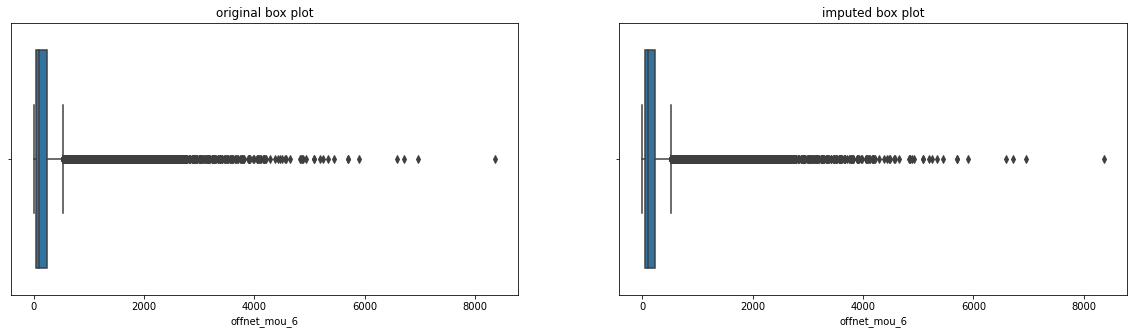

In [50]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(churn_base_data['offnet_mou_6'])
plt.title("original box plot")

plt.subplot(1,2,2)
sns.boxplot(churn_base_data_imputed['offnet_mou_6'])
plt.title("imputed box plot")

Text(0.5, 1.0, 'imputed box plot')

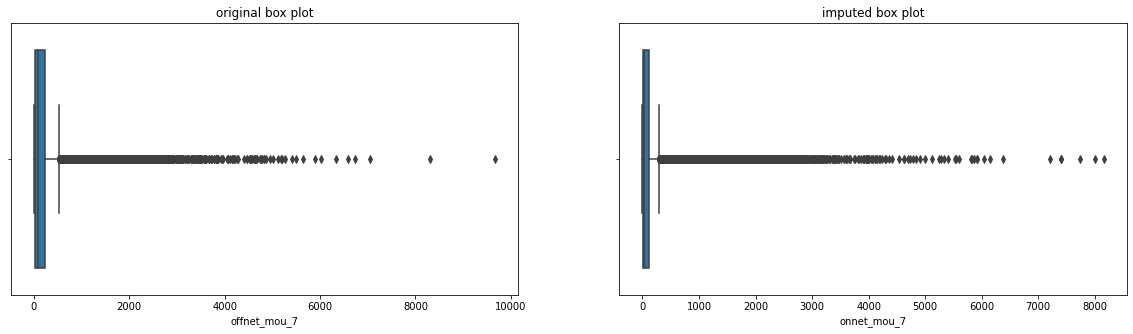

In [51]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(churn_base_data['offnet_mou_7'])
plt.title("original box plot")

plt.subplot(1,2,2)
sns.boxplot(churn_base_data_imputed['onnet_mou_7'])
plt.title("imputed box plot")

Text(0.5, 1.0, 'imputed box plot')

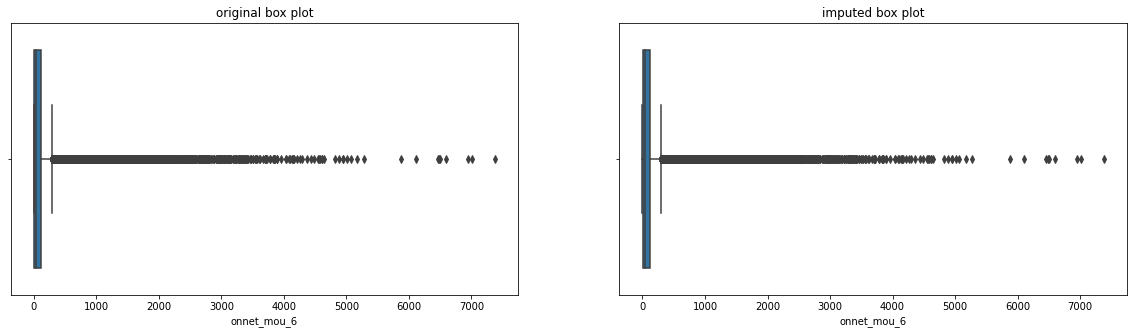

In [49]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(churn_base_data['onnet_mou_6'])
plt.title("original box plot")


plt.subplot(1,2,2)
sns.boxplot(churn_base_data_imputed['onnet_mou_6'])
plt.title("imputed box plot")

Text(0.5, 1.0, 'imputed box plot')

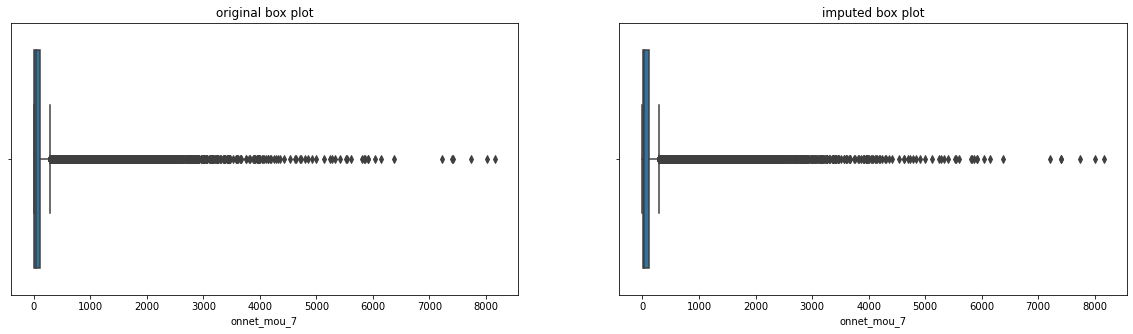

In [48]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(churn_base_data['onnet_mou_7'])
plt.title("original box plot")


plt.subplot(1,2,2)
sns.boxplot(churn_base_data_imputed['onnet_mou_7'])
plt.title("imputed box plot")

**Note how we do not have any missing values remaining after imputation**

In [52]:
churn_data_imputation_transformed = churn_base_data.copy()
churn_data_imputation_transformed = pd.concat([churn_base_data_imputed, churn_base_data[churn_base_data.columns.difference(churn_base_data_imputed.columns)]], axis=1)
churn_data_imputation_transformed.isnull().sum()

loc_og_t2o_mou    0
std_og_t2o_mou    0
loc_ic_t2o_mou    0
onnet_mou_6       0
onnet_mou_7       0
                 ..
vol_2g_mb_9       0
vol_3g_mb_6       0
vol_3g_mb_7       0
vol_3g_mb_8       0
vol_3g_mb_9       0
Length: 200, dtype: int64

**Visualising imputed data**

In [53]:
churn_data_imputation_transformed.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  onnet_mou_6  onnet_mou_7  \
0             0.0             0.0             0.0    24.546667     1.206667   
1             0.0             0.0             0.0    24.110000    78.680000   
2             0.0             0.0             0.0    11.540000    55.240000   
3             0.0             0.0             0.0    99.910000    54.390000   
4             0.0             0.0             0.0    50.310000   149.440000   

   onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
0         0.00    48.406667        130.72     16.483333          0.00   
1         7.68    18.340000         15.74     99.840000        304.76   
2        37.26    74.810000        143.33    220.590000        208.36   
3       310.98   241.710000        123.31    109.010000         71.68   
4        83.89    58.780000         76.96     91.880000        124.26   

   offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  \
0     58.966667          73.99           0.00           0.00       4.296667   
1     53.760000           0.00           0.00           0.00       0.000000   
2    118.910000           0.00           0.00           0.00      38.490000   
3    113.540000           0.00          54.86          44.38       0.000000   
4     45.810000           0.00           0.00           0.00       0.000000   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0         117.64           0.00           0.00       9.276667   
1           0.00           0.00           0.00       0.000000   
2           0.00           0.00           0.00      70.940000   
3           0.00          28.09          39.04       0.000000   
4           0.00           0.00           0.00       0.000000   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0         18.396667          1.206667              0.00              2.10   
1         23.880000         74.560000              7.68             18.34   
2          7.190000         28.740000             13.58             14.39   
3         73.680000         34.810000             10.61             15.49   
4         50.310000        149.440000             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0         15.443333          4.483333              0.00             14.74   
1         11.510000         75.940000            291.86             53.76   
2         29.340000         16.860000             38.46             28.16   
3        107.430000         83.210000             22.46             65.46   
4         67.640000         91.880000            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              4.91              2.06   
4              0.00              0.00              0.00              1.93   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0               0.0              0.00              0.00          5.376667   
1               0.0              2.91              0.00          0.000000   
2               0.0            135.54             45.76          0.480000   
3               0.0              0.00              0.00          0.000000   
4               0.0              0.00              0.00          0.000000   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0     33.843333      5.696667          0.00     16.846667          3.233333   
1     35.390000    150.510000        299.54     72.110000          0.230000   
2     60.660000     67.410000         67.66     64.810000          4.340000   
3    183.030000    118.680000         37.99     83.0300

In [57]:
date_cols = [col for col in churn_data_imputation_transformed.columns if 'amt' in col]
print(date_cols)

['av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9', 'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'last_day_rch_amt_9', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9']


**Calculating average recharge amount for 6,7 months**

In [60]:
churn_data_imputation_transformed['avg_rech_amt_6_7'] = 0
churn_data_imputation_transformed['avg_rech_amt_6_7'] = ((churn_data_imputation_transformed['total_rech_amt_6'] + churn_data_imputation_transformed['total_rech_amt_7'])/2)
churn_data_imputation_transformed[['total_rech_amt_6','total_rech_amt_7','avg_rech_amt_6_7']].head()

total_rech_amt_6  total_rech_amt_7  avg_rech_amt_6_7
0               362               252             307.0
1                74               384             229.0
2               168               315             241.5
3               230               310             270.0
4               196               350             273.0

**Calculating 70th percentile value**

In [61]:
churn_data_imputation_transformed.avg_rech_amt_6_7.quantile(0.7)

368.5

**Filtering HCV customers**

In [62]:
churn_data_hcv = churn_data_imputation_transformed.loc[churn_data_imputation_transformed['avg_rech_amt_6_7']>=(churn_data_imputation_transformed.avg_rech_amt_6_7.quantile(0.7))]

**Shape of dataframe with HCV customers**

In [73]:
churn_data_hcv.shape

(30011, 201)

**Shape of original dataframe**

In [74]:
churn_data_imputation_transformed.shape

(99999, 201)

**30% data retained: approximately 30k rows**

In [76]:
date_cols = [col for col in churn_data_hcv.columns if 'vol' in col]
print(date_cols)

['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_2g_mb_9', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'vol_3g_mb_9']


In [77]:
churn_data_hcv["churned"] = 0
churn_data_hcv["churned"].loc[(churn_data_hcv['total_ic_mou_9']==0)&(churn_data_hcv['total_og_mou_9']==0)&(churn_data_hcv['vol_2g_mb_9']==0)&(churn_data_hcv['vol_3g_mb_9']==0)] = 1

In [78]:
churn_data_hcv['churned'].value_counts().head()

0    27418
1     2593
Name: churned, dtype: int64

**Percent customers churned = 2593/30011 = 8.6%**

In [79]:
date_cols = [col for col in churn_data_hcv.columns if '_9' in col]
print(date_cols)

['onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'arpu_2g_9', 'arpu_3g_9', 'arpu_9', 'av_rech_amt_data_9', 'fb_user_9', 'last_day_rch_amt_9', 'max_rech_amt_9', 'max_rech_data_9', 'monthly_2g_9', 'monthly_3g_9', 'sachet_2g_9', 'sachet_3g_9', 'total_ic_mou_9', 'total_og_mou_9', 'total_rech_amt_9', 'total_rech_data_9', 'total_rech_num_9', 'vol_2g_mb_9', 'vol_3g_mb_9']


**Removing columns from churned month**

In [80]:
churned_month_columns = ['onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9'
, 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'loc_ic_t2t_mou_9'
, 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9'
, 'ic_others_9', 'arpu_2g_9', 'arpu_3g_9', 'arpu_9', 'av_rech_amt_data_9', 'fb_user_9', 'last_day_rch_amt_9', 'max_rech_amt_9', 'max_rech_data_9', 'monthly_2g_9', 'monthly_3g_9', 'sachet_2g_9'
, 'sachet_3g_9', 'total_ic_mou_9', 'total_og_mou_9', 'total_rech_amt_9', 'total_rech_data_9', 'total_rech_num_9', 'vol_2g_mb_9', 'vol_3g_mb_9']

churn_data_hcv_reduced = churn_data_hcv.drop(churned_month_columns,axis=1).copy()

In [82]:
print("columns remaining columns:",churn_data_hcv_reduced.shape)

columns remaining columns: (30011, 154)


**Derieved column for high data user customer**

In [85]:
churn_data_hcv_reduced['avg_data_used'] = 0
churn_data_hcv_reduced['avg_data_used'] = ((churn_data_hcv_reduced['vol_2g_mb_6'] + churn_data_hcv_reduced['vol_3g_mb_6'] + churn_data_hcv_reduced['vol_2g_mb_7'] + churn_data_hcv_reduced['vol_3g_mb_7']+ churn_data_hcv_reduced['vol_2g_mb_8'] + churn_data_hcv_reduced['vol_3g_mb_8'])/6)


churn_data_hcv_reduced['high_data_user'] = 0
churn_data_hcv_reduced['high_data_user'].loc[churn_data_hcv_reduced['avg_data_used'] >= (churn_data_hcv_reduced.avg_data_used.quantile(0.7))] = 1
churn_data_hcv_reduced[['avg_data_used','high_data_user']].head()

avg_data_used  high_data_user
7        0.000000               0
8      186.486667               1
13       0.003333               0
16       0.000000               0
17       0.000000               0

**Creating derived variables tracking data usage patterns over months:**
1.   data usage volume of 7th month versus 6th month 
2.   data usage volume of 8th month versus 7th month
3.   net data usage drop across 7th and 8th month
4.   Was there a consistent data usage drop for 7th and 8th month.

These variables are based on assumption that customers gradually switch from one operator to other, with reducing consumption of services from the operator they are leaving. This also captures a customer behavior who is facing issues with services prior to leaving.

In [103]:
churn_data_hcv_reduced['data_usage_7from6'] = 0
churn_data_hcv_reduced['data_usage_8versus7'] = 0
churn_data_hcv_reduced['data_usage_7versus6'] = (((churn_data_hcv_reduced['vol_2g_mb_7']+churn_data_hcv_reduced['vol_3g_mb_7']) / (churn_data_hcv_reduced['vol_2g_mb_6']+churn_data_hcv_reduced['vol_3g_mb_6']))-1) 
churn_data_hcv_reduced['data_usage_8versus7'] = (((churn_data_hcv_reduced['vol_2g_mb_8']+churn_data_hcv_reduced['vol_3g_mb_8']) / (churn_data_hcv_reduced['vol_2g_mb_7']+churn_data_hcv_reduced['vol_3g_mb_7']))-1)
churn_data_hcv_reduced['data_usage_7versus6'] = churn_data_hcv_reduced['data_usage_7versus6'].fillna(0)
churn_data_hcv_reduced['data_usage_8versus7'] = churn_data_hcv_reduced['data_usage_8versus7'].fillna(0)
churn_data_hcv_reduced['data_usage_7versus6'].replace(np.inf, 1, inplace=True) 
churn_data_hcv_reduced['data_usage_7versus6'].replace(-np.inf, -1, inplace=True) 
churn_data_hcv_reduced['data_usage_8versus7'].replace(np.inf, 1, inplace=True) 
churn_data_hcv_reduced['data_usage_8versus7'].replace(-np.inf, -1, inplace=True) 

churn_data_hcv_reduced['net_data_usage_drop_across_7_8'] = 0
churn_data_hcv_reduced['net_data_usage_drop_across_7_8'] = churn_data_hcv_reduced['data_usage_8versus7'] + churn_data_hcv_reduced['data_usage_7versus6']

churn_data_hcv_reduced['continued_data_usage_drop_across_7_8'] = 0
churn_data_hcv_reduced['continued_data_usage_drop_across_7_8'].loc[(churn_data_hcv_reduced['data_usage_7versus6']<0) & (churn_data_hcv_reduced['data_usage_8versus7']<0)] = 1

**Creating derived variables tracking data usage patterns over months:**
1.   call volume of 7th month versus 6th month 
2.   call  volume of 8th month versus 7th month
3.   net call volume drop across 7th and 8th month
4.   Was there a consistent call volume drop for 7th and 8th month.

These variables are based on assumption that customers gradually switch from one operator to other, with reducing consumption of services from the operator they are leaving. This also captures a customer behavior who is facing issues with services prior to leaving.

In [104]:
churn_data_hcv_reduced['call_usage_7from6'] = 0
churn_data_hcv_reduced['call_usage_8versus7'] = 0
churn_data_hcv_reduced['call_usage_7versus6'] = (((churn_data_hcv_reduced['total_ic_mou_7']+churn_data_hcv_reduced['total_og_mou_7']) / (churn_data_hcv_reduced['total_ic_mou_6']+churn_data_hcv_reduced['total_og_mou_6']))-1) 
churn_data_hcv_reduced['call_usage_8versus7'] = (((churn_data_hcv_reduced['total_ic_mou_8']+churn_data_hcv_reduced['total_og_mou_8']) / (churn_data_hcv_reduced['total_ic_mou_7']+churn_data_hcv_reduced['total_og_mou_7']))-1)

churn_data_hcv_reduced['call_usage_7from6'] = churn_data_hcv_reduced['call_usage_7from6'].fillna(0)
churn_data_hcv_reduced['call_usage_8versus7'] = churn_data_hcv_reduced['call_usage_8versus7'].fillna(0)
churn_data_hcv_reduced['call_usage_7from6'].replace(np.inf, 1, inplace=True) 
churn_data_hcv_reduced['call_usage_7from6'].replace(-np.inf, -1, inplace=True) 
churn_data_hcv_reduced['call_usage_8versus7'].replace(np.inf, 1, inplace=True) 
churn_data_hcv_reduced['call_usage_8versus7'].replace(-np.inf, -1, inplace=True) 

churn_data_hcv_reduced['net_call_usage_drop_across_7_8'] = 0
churn_data_hcv_reduced['net_call_usage_drop_across_7_8'] = churn_data_hcv_reduced['call_usage_8versus7'] + churn_data_hcv_reduced['call_usage_7versus6']

churn_data_hcv_reduced['continued_call_usage_drop_across_7_8'] = 0
churn_data_hcv_reduced['continued_call_usage_drop_across_7_8'].loc[(churn_data_hcv_reduced['call_usage_7versus6']<0) & (churn_data_hcv_reduced['call_usage_8versus7']<0)] = 1

**Creating derived variables tracking recharge amount patterns over months:**
1.   max recharge amount of 7th month versus 6th month 
2.   max recharge amount of 8th month versus 7th month
3.   total recharge amount of 7th month versus 6th month
4.   total recharge amount of 8th month versus 7th month
5.   Was there a consistent total recharge amount drop for 7th and 8th month.
6.   Was there a consistent max recharge amount drop for 7th and 8th month.

These variables are based on assumption that customers gradually switch from one operator to other, with reducing consumption of services from the operator they are leaving. This also captures a customer behavior who is facing issues with services prior to leaving.

In [105]:
churn_data_hcv_reduced['max_rech_amt_7from6'] = 0
churn_data_hcv_reduced['max_rech_amt_8from7'] = 0
churn_data_hcv_reduced['max_rech_amt_7from6'] = (((churn_data_hcv_reduced['max_rech_amt_7']) / (churn_data_hcv_reduced['max_rech_amt_6']))-1) 
churn_data_hcv_reduced['max_rech_amt_8from7'] = (((churn_data_hcv_reduced['max_rech_amt_8']) / (churn_data_hcv_reduced['max_rech_amt_7']))-1)

churn_data_hcv_reduced['max_rech_amt_7from6'] = churn_data_hcv_reduced['max_rech_amt_7from6'].fillna(0)
churn_data_hcv_reduced['max_rech_amt_8from7'] = churn_data_hcv_reduced['max_rech_amt_8from7'].fillna(0)
churn_data_hcv_reduced['max_rech_amt_7from6'].replace(np.inf, 1, inplace=True) 
churn_data_hcv_reduced['max_rech_amt_7from6'].replace(-np.inf, -1, inplace=True) 
churn_data_hcv_reduced['max_rech_amt_8from7'].replace(np.inf, 1, inplace=True) 
churn_data_hcv_reduced['max_rech_amt_8from7'].replace(-np.inf, -1, inplace=True)

churn_data_hcv_reduced['total_rech_amt_7from6'] = 0
churn_data_hcv_reduced['total_rech_amt_8from7'] = 0
churn_data_hcv_reduced['total_rech_amt_7from6'] = (((churn_data_hcv_reduced['total_rech_amt_7']) / (churn_data_hcv_reduced['total_rech_amt_6']))-1) 
churn_data_hcv_reduced['total_rech_amt_8from7'] = (((churn_data_hcv_reduced['total_rech_amt_8']) / (churn_data_hcv_reduced['total_rech_amt_7']))-1)

churn_data_hcv_reduced['total_rech_amt_7from6'] = churn_data_hcv_reduced['total_rech_amt_7from6'].fillna(0)
churn_data_hcv_reduced['total_rech_amt_8from7'] = churn_data_hcv_reduced['total_rech_amt_8from7'].fillna(0)
churn_data_hcv_reduced['total_rech_amt_7from6'].replace(np.inf, 1, inplace=True) 
churn_data_hcv_reduced['total_rech_amt_7from6'].replace(-np.inf, -1, inplace=True) 
churn_data_hcv_reduced['total_rech_amt_8from7'].replace(np.inf, 1, inplace=True) 
churn_data_hcv_reduced['total_rech_amt_8from7'].replace(-np.inf, -1, inplace=True)

churn_data_hcv_reduced['continued_max_rech_amt_drop_across_7_8'] = 0
churn_data_hcv_reduced['continued_total_rech_amt_drop_across_7_8'] = 0
churn_data_hcv_reduced['continued_max_rech_amt_drop_across_7_8'].loc[(churn_data_hcv_reduced['max_rech_amt_7from6']<0) & (churn_data_hcv_reduced['max_rech_amt_8from7']<0)] = 1
churn_data_hcv_reduced['continued_total_rech_amt_drop_across_7_8'].loc[(churn_data_hcv_reduced['total_rech_amt_7from6']<0) & (churn_data_hcv_reduced['total_rech_amt_8from7']<0)] = 1

In [106]:
churn_data_hcv_reduced_outlier = churn_data_hcv_reduced.copy()

In [107]:
churn_data_hcv_reduced_outlier.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  onnet_mou_6  onnet_mou_7  \
7              0.0             0.0             0.0        57.84        54.68   
8              0.0             0.0             0.0       413.69       351.03   
13             0.0             0.0             0.0       501.76       108.39   
16             0.0             0.0             0.0        50.51        74.01   
17             0.0             0.0             0.0      1185.91         9.28   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
7         52.29        453.43        567.16        325.91          16.23   
8         35.08         94.66         80.63        136.48           0.00   
13       534.24        413.31        119.28        482.46          23.53   
16        70.61        296.29        229.74        162.76           0.00   
17         7.79         61.64          0.00          5.54           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
7           33.49          31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00           0.00   
13         144.24          72.11           7.98          35.26           1.44   
16           2.83           0.00           0.00          17.74           0.00   
17           4.76           4.81           0.00           8.46          13.34   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
13             49.63              6.19             36.01            151.13   
16             42.61             65.16             67.38            273.29   
17             38.99              0.00              0.00             58.54   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
13             47.28            294.46              4.54              0.00   
16            145.99            128.28              0.00              4.48   
17              0.00              0.00              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
13             23.51               0.0               0.0              0.49   
16             10.26               0.0               0.0              0.00   
17              0.00               0.0               0.0              0.00   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
13        205.31         53.48        353.99            446.41   
16        315.91        215.64        205.93              7.89   
17         97.54          0.00          0.00           1146.91   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
13             85.98            498.23            255.36             52.94   
16              2.58              3.23             22.99             64.51   
17              0.81              0.00              1.55              0.00   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
13            156.94              0.00              0.00              0.

In [108]:
churn_data_hcv_reduced_outlier.isnull().sum()

loc_og_t2o_mou                              0
std_og_t2o_mou                              0
loc_ic_t2o_mou                              0
onnet_mou_6                                 0
onnet_mou_7                                 0
                                           ..
max_rech_amt_8from7                         0
total_rech_amt_7from6                       0
total_rech_amt_8from7                       0
continued_max_rech_amt_drop_across_7_8      0
continued_total_rech_amt_drop_across_7_8    0
Length: 172, dtype: int64

# **Identifying categorical columns**

**'sachet_3g_6', 'sachet_3g_7' & 'sachet_3g_8' are a categorical columns given 5 unique levels/values**

In [9]:
print(churn_data_hcv_reduced_outlier['sachet_3g_6'].value_counts().head(10))
print(churn_data_hcv_reduced_outlier['sachet_3g_7'].value_counts().head(10)) 
print(churn_data_hcv_reduced_outlier['sachet_3g_8'].value_counts().head(10))     

0    28033
1     1307
2      313
3      119
4       66
5       37
6       27
7       26
9       15
8       15
Name: sachet_3g_6, dtype: int64
0    28053
1     1233
2      312
3      115
4       72
5       66
6       42
7       18
9       16
8       14
Name: sachet_3g_7, dtype: int64
0    28282
1     1058
2      252
3      129
4       73
5       66
6       26
7       23
8       22
9       12
Name: sachet_3g_8, dtype: int64


**'fb_user6' , 'fb_user7' , 'fb_user8' are categorical variables given binary levels.**

In [122]:
print(churn_data_hcv_reduced_outlier['fb_user_6'].value_counts().head())
print(churn_data_hcv_reduced_outlier['fb_user_7'].value_counts().head())    
print(churn_data_hcv_reduced_outlier['fb_user_8'].value_counts().head())

0.0    19781
1.0    10230
Name: fb_user_6, dtype: int64
0.0    19634
1.0    10377
Name: fb_user_7, dtype: int64
0.0    20169
1.0     9842
Name: fb_user_8, dtype: int64


**Categorical columns with 5 levels each: monthly_2g_6, monthly_2g_7, monthly_2g_8 , monthly_3g_6, monthly_3g_7,monthly_3g_8**

In [8]:
print(churn_data_hcv_reduced_outlier['monthly_2g_6'].value_counts().head(10))
print(churn_data_hcv_reduced_outlier['monthly_2g_7'].value_counts().head(10))
print(churn_data_hcv_reduced_outlier['monthly_2g_8'].value_counts().head(10))

print(churn_data_hcv_reduced_outlier['monthly_3g_6'].value_counts().head(10))
print(churn_data_hcv_reduced_outlier['monthly_3g_7'].value_counts().head(10))
print(churn_data_hcv_reduced_outlier['monthly_3g_8'].value_counts().head(10))

0    26682
1     2951
2      345
3       26
4        7
Name: monthly_2g_6, dtype: int64
0    26556
1     3013
2      406
3       29
4        5
5        2
Name: monthly_2g_7, dtype: int64
0    26938
1     2761
2      283
3       22
4        5
5        2
Name: monthly_2g_8, dtype: int64
0     26432
1      2541
2       697
3       207
4        74
5        32
6        11
7         9
8         3
11        2
Name: monthly_3g_6, dtype: int64
0    26361
1     2466
2      822
3      207
4       68
5       39
6       23
7       10
8        5
9        4
Name: monthly_3g_7, dtype: int64
0    26526
1     2403
2      736
3      197
4       87
5       30
6       14
7        9
9        3
8        3
Name: monthly_3g_8, dtype: int64


#**Converting categorical columns into object data type**

In [20]:
churn_data_hcv_reduced_outlier['cat_sachet_3g_6'] = "zero"
churn_data_hcv_reduced_outlier['cat_sachet_3g_6'].loc[churn_data_hcv_reduced_outlier['sachet_3g_6']==1] = "one" 
churn_data_hcv_reduced_outlier['cat_sachet_3g_6'].loc[churn_data_hcv_reduced_outlier['sachet_3g_6']==2] = "two" 
churn_data_hcv_reduced_outlier['cat_sachet_3g_6'].loc[churn_data_hcv_reduced_outlier['sachet_3g_6']==3] = "three" 
churn_data_hcv_reduced_outlier['cat_sachet_3g_6'].loc[churn_data_hcv_reduced_outlier['sachet_3g_6']==4] = "four"
churn_data_hcv_reduced_outlier['cat_sachet_3g_6'].loc[churn_data_hcv_reduced_outlier['sachet_3g_6']==5] = "five"
churn_data_hcv_reduced_outlier['cat_sachet_3g_6'].loc[churn_data_hcv_reduced_outlier['sachet_3g_6']>=6] = "six_and_above"

churn_data_hcv_reduced_outlier['cat_sachet_3g_7'] = "zero"
churn_data_hcv_reduced_outlier['cat_sachet_3g_7'].loc[churn_data_hcv_reduced_outlier['sachet_3g_7']==1] = "one" 
churn_data_hcv_reduced_outlier['cat_sachet_3g_7'].loc[churn_data_hcv_reduced_outlier['sachet_3g_7']==2] = "two" 
churn_data_hcv_reduced_outlier['cat_sachet_3g_7'].loc[churn_data_hcv_reduced_outlier['sachet_3g_7']==3] = "three" 
churn_data_hcv_reduced_outlier['cat_sachet_3g_7'].loc[churn_data_hcv_reduced_outlier['sachet_3g_7']==4] = "four"
churn_data_hcv_reduced_outlier['cat_sachet_3g_7'].loc[churn_data_hcv_reduced_outlier['sachet_3g_7']==5] = "five"
churn_data_hcv_reduced_outlier['cat_sachet_3g_7'].loc[churn_data_hcv_reduced_outlier['sachet_3g_7']>=6] = "six_and_above"

churn_data_hcv_reduced_outlier['cat_sachet_3g_8'] = "zero"
churn_data_hcv_reduced_outlier['cat_sachet_3g_8'].loc[churn_data_hcv_reduced_outlier['sachet_3g_8']==1] = "one" 
churn_data_hcv_reduced_outlier['cat_sachet_3g_8'].loc[churn_data_hcv_reduced_outlier['sachet_3g_8']==2] = "two" 
churn_data_hcv_reduced_outlier['cat_sachet_3g_8'].loc[churn_data_hcv_reduced_outlier['sachet_3g_8']==3] = "three" 
churn_data_hcv_reduced_outlier['cat_sachet_3g_8'].loc[churn_data_hcv_reduced_outlier['sachet_3g_8']==4] = "four"
churn_data_hcv_reduced_outlier['cat_sachet_3g_8'].loc[churn_data_hcv_reduced_outlier['sachet_3g_8']==5] = "five"
churn_data_hcv_reduced_outlier['cat_sachet_3g_8'].loc[churn_data_hcv_reduced_outlier['sachet_3g_8']>=6] = "six_and_above"

print(churn_data_hcv_reduced_outlier['sachet_3g_6'].value_counts().head(10))
print(churn_data_hcv_reduced_outlier['cat_sachet_3g_6'].value_counts().head(10))

print(churn_data_hcv_reduced_outlier['sachet_3g_7'].value_counts().head(10))
print(churn_data_hcv_reduced_outlier['cat_sachet_3g_7'].value_counts().head(10))

print(churn_data_hcv_reduced_outlier['sachet_3g_8'].value_counts().head(10))
print(churn_data_hcv_reduced_outlier['cat_sachet_3g_8'].value_counts().head(10))

#churn_data_hcv_reduced_outlier = churn_data_hcv_reduced_outlier.drop(['sachet_3g_6','sachet_3g_7','sachet_3g_8'],axis=1).copy()

0    28033
1     1307
2      313
3      119
4       66
5       37
6       27
7       26
9       15
8       15
Name: sachet_3g_6, dtype: int64
zero             28033
one               1307
two                313
six_and_above      136
three              119
four                66
five                37
Name: cat_sachet_3g_6, dtype: int64
0    28053
1     1233
2      312
3      115
4       72
5       66
6       42
7       18
9       16
8       14
Name: sachet_3g_7, dtype: int64
zero             28053
one               1233
two                312
six_and_above      160
three              115
four                72
five                66
Name: cat_sachet_3g_7, dtype: int64
0    28282
1     1058
2      252
3      129
4       73
5       66
6       26
7       23
8       22
9       12
Name: sachet_3g_8, dtype: int64
zero             28282
one               1058
two                252
six_and_above      151
three              129
four                73
five                66
Name: cat_sachet_3g

sachet_3g_8         int64
cat_sachet_3g_8    object
dtype: object

In [31]:
churn_data_hcv_reduced_outlier['cat_sachet_2g_6'] = "zero"
churn_data_hcv_reduced_outlier['cat_sachet_2g_6'].loc[churn_data_hcv_reduced_outlier['sachet_2g_6']==1] = "one" 
churn_data_hcv_reduced_outlier['cat_sachet_2g_6'].loc[churn_data_hcv_reduced_outlier['sachet_2g_6']==2] = "two" 
churn_data_hcv_reduced_outlier['cat_sachet_2g_6'].loc[churn_data_hcv_reduced_outlier['sachet_2g_6']==3] = "three" 
churn_data_hcv_reduced_outlier['cat_sachet_2g_6'].loc[churn_data_hcv_reduced_outlier['sachet_2g_6']==4] = "four"
churn_data_hcv_reduced_outlier['cat_sachet_2g_6'].loc[churn_data_hcv_reduced_outlier['sachet_2g_6']==5] = "five"
churn_data_hcv_reduced_outlier['cat_sachet_2g_6'].loc[churn_data_hcv_reduced_outlier['sachet_2g_6']==6] = "six"
churn_data_hcv_reduced_outlier['cat_sachet_2g_6'].loc[churn_data_hcv_reduced_outlier['sachet_2g_6']>=7] = "seven_and_above"

churn_data_hcv_reduced_outlier['cat_sachet_2g_7'] = "zero"
churn_data_hcv_reduced_outlier['cat_sachet_2g_7'].loc[churn_data_hcv_reduced_outlier['sachet_2g_7']==1] = "one" 
churn_data_hcv_reduced_outlier['cat_sachet_2g_7'].loc[churn_data_hcv_reduced_outlier['sachet_2g_7']==2] = "two" 
churn_data_hcv_reduced_outlier['cat_sachet_2g_7'].loc[churn_data_hcv_reduced_outlier['sachet_2g_7']==3] = "three" 
churn_data_hcv_reduced_outlier['cat_sachet_2g_7'].loc[churn_data_hcv_reduced_outlier['sachet_2g_7']==4] = "four"
churn_data_hcv_reduced_outlier['cat_sachet_2g_7'].loc[churn_data_hcv_reduced_outlier['sachet_2g_7']==5] = "five"
churn_data_hcv_reduced_outlier['cat_sachet_2g_7'].loc[churn_data_hcv_reduced_outlier['sachet_2g_7']==6] = "six"
churn_data_hcv_reduced_outlier['cat_sachet_2g_7'].loc[churn_data_hcv_reduced_outlier['sachet_2g_7']>=7] = "seven_and_above"

churn_data_hcv_reduced_outlier['cat_sachet_2g_8'] = "zero"
churn_data_hcv_reduced_outlier['cat_sachet_2g_8'].loc[churn_data_hcv_reduced_outlier['sachet_2g_8']==1] = "one" 
churn_data_hcv_reduced_outlier['cat_sachet_2g_8'].loc[churn_data_hcv_reduced_outlier['sachet_2g_8']==2] = "two" 
churn_data_hcv_reduced_outlier['cat_sachet_2g_8'].loc[churn_data_hcv_reduced_outlier['sachet_2g_8']==3] = "three" 
churn_data_hcv_reduced_outlier['cat_sachet_2g_8'].loc[churn_data_hcv_reduced_outlier['sachet_2g_8']==4] = "four"
churn_data_hcv_reduced_outlier['cat_sachet_2g_8'].loc[churn_data_hcv_reduced_outlier['sachet_2g_8']==5] = "five"
churn_data_hcv_reduced_outlier['cat_sachet_2g_8'].loc[churn_data_hcv_reduced_outlier['sachet_2g_8']==6] = "six"
churn_data_hcv_reduced_outlier['cat_sachet_2g_8'].loc[churn_data_hcv_reduced_outlier['sachet_2g_8']>=7] = "seven_and_above"

print(churn_data_hcv_reduced_outlier['sachet_2g_6'].value_counts().head(10))
print(churn_data_hcv_reduced_outlier['cat_sachet_2g_6'].value_counts().head(10))

print(churn_data_hcv_reduced_outlier['sachet_2g_7'].value_counts().head(10))
print(churn_data_hcv_reduced_outlier['cat_sachet_2g_7'].value_counts().head(10))

print(churn_data_hcv_reduced_outlier['sachet_2g_8'].value_counts().head(10))
print(churn_data_hcv_reduced_outlier['cat_sachet_2g_8'].value_counts().head(10))

#churn_data_hcv_reduced_outlier = churn_data_hcv_reduced_outlier.drop(['sachet_3g_6','sachet_3g_7','sachet_3g_8'],axis=1).copy()

0    24778
1     2363
2     1009
3      604
4      399
5      211
6      153
7      107
8       86
9       72
Name: sachet_2g_6, dtype: int64
zero               24778
one                 2363
two                 1009
three                604
seven_and_above      494
four                 399
five                 211
six                  153
Name: cat_sachet_2g_6, dtype: int64
0     24550
1      2173
2      1005
3       590
4       453
5       362
6       253
7       163
8       121
10       72
Name: sachet_2g_7, dtype: int64
zero               24550
one                 2173
two                 1005
seven_and_above      625
three                590
four                 453
five                 362
six                  253
Name: cat_sachet_2g_7, dtype: int64
0    23927
1     2662
2      978
3      658
4      544
5      435
6      265
7      138
8       94
9       75
Name: sachet_2g_8, dtype: int64
zero               23927
one                 2662
two                  978
three            

In [25]:
churn_data_hcv_reduced_outlier['cat_fb_user_6'] = "zero"
churn_data_hcv_reduced_outlier['cat_fb_user_6'].loc[churn_data_hcv_reduced_outlier['fb_user_6']==1] = "one" 

churn_data_hcv_reduced_outlier['cat_fb_user_7'] = "zero"
churn_data_hcv_reduced_outlier['cat_fb_user_7'].loc[churn_data_hcv_reduced_outlier['fb_user_7']==1] = "one" 

churn_data_hcv_reduced_outlier['cat_fb_user_8'] = "zero"
churn_data_hcv_reduced_outlier['cat_fb_user_8'].loc[churn_data_hcv_reduced_outlier['fb_user_8']==1] = "one" 

print(churn_data_hcv_reduced_outlier['fb_user_6'].value_counts().head(10))
print(churn_data_hcv_reduced_outlier['cat_fb_user_6'].value_counts().head(10))

print(churn_data_hcv_reduced_outlier['fb_user_7'].value_counts().head(10))
print(churn_data_hcv_reduced_outlier['cat_fb_user_7'].value_counts().head(10))

print(churn_data_hcv_reduced_outlier['fb_user_8'].value_counts().head(10))
print(churn_data_hcv_reduced_outlier['cat_fb_user_8'].value_counts().head(10))

0.0    19781
1.0    10230
Name: fb_user_6, dtype: int64
zero    19781
one     10230
Name: cat_fb_user_6, dtype: int64
0.0    19634
1.0    10377
Name: fb_user_7, dtype: int64
zero    19634
one     10377
Name: cat_fb_user_7, dtype: int64
0.0    20169
1.0     9842
Name: fb_user_8, dtype: int64
zero    20169
one      9842
Name: cat_fb_user_8, dtype: int64


In [35]:
churn_data_hcv_reduced_outlier['cat_monthly_2g_6'] = "zero"
churn_data_hcv_reduced_outlier['cat_monthly_2g_6'].loc[churn_data_hcv_reduced_outlier['monthly_2g_6']==1] = "one" 
churn_data_hcv_reduced_outlier['cat_monthly_2g_6'].loc[churn_data_hcv_reduced_outlier['monthly_2g_6']==2] = "two" 
churn_data_hcv_reduced_outlier['cat_monthly_2g_6'].loc[churn_data_hcv_reduced_outlier['monthly_2g_6']==3] = "three_and_above" 

churn_data_hcv_reduced_outlier['cat_monthly_2g_7'] = "zero"
churn_data_hcv_reduced_outlier['cat_monthly_2g_7'].loc[churn_data_hcv_reduced_outlier['monthly_2g_7']==1] = "one" 
churn_data_hcv_reduced_outlier['cat_monthly_2g_7'].loc[churn_data_hcv_reduced_outlier['monthly_2g_7']==2] = "two" 
churn_data_hcv_reduced_outlier['cat_monthly_2g_7'].loc[churn_data_hcv_reduced_outlier['monthly_2g_7']==3] = "three_and_above" 

churn_data_hcv_reduced_outlier['cat_monthly_2g_8'] = "zero"
churn_data_hcv_reduced_outlier['cat_monthly_2g_8'].loc[churn_data_hcv_reduced_outlier['monthly_2g_8']==1] = "one" 
churn_data_hcv_reduced_outlier['cat_monthly_2g_8'].loc[churn_data_hcv_reduced_outlier['monthly_2g_8']==2] = "two" 
churn_data_hcv_reduced_outlier['cat_monthly_2g_8'].loc[churn_data_hcv_reduced_outlier['monthly_2g_8']==3] = "three_and_above" 

print(churn_data_hcv_reduced_outlier['monthly_2g_6'].value_counts().head(10))
print(churn_data_hcv_reduced_outlier['cat_monthly_2g_6'].value_counts().head(10))

print(churn_data_hcv_reduced_outlier['monthly_2g_7'].value_counts().head(10))
print(churn_data_hcv_reduced_outlier['cat_monthly_2g_7'].value_counts().head(10))

print(churn_data_hcv_reduced_outlier['monthly_2g_8'].value_counts().head(10))
print(churn_data_hcv_reduced_outlier['cat_monthly_2g_8'].value_counts().head(10))

#churn_data_hcv_reduced_outlier = churn_data_hcv_reduced_outlier.drop(['sachet_3g_6','sachet_3g_7','sachet_3g_8'],axis=1).copy()

0    26682
1     2951
2      345
3       26
4        7
Name: monthly_2g_6, dtype: int64
zero               26689
one                 2951
two                  345
three_and_above       26
Name: cat_monthly_2g_6, dtype: int64
0    26556
1     3013
2      406
3       29
4        5
5        2
Name: monthly_2g_7, dtype: int64
zero               26563
one                 3013
two                  406
three_and_above       29
Name: cat_monthly_2g_7, dtype: int64
0    26938
1     2761
2      283
3       22
4        5
5        2
Name: monthly_2g_8, dtype: int64
zero               26945
one                 2761
two                  283
three_and_above       22
Name: cat_monthly_2g_8, dtype: int64


In [39]:
churn_data_hcv_reduced_outlier['cat_monthly_3g_6'] = "zero"
churn_data_hcv_reduced_outlier['cat_monthly_3g_6'].loc[churn_data_hcv_reduced_outlier['monthly_3g_6']==1] = "one" 
churn_data_hcv_reduced_outlier['cat_monthly_3g_6'].loc[churn_data_hcv_reduced_outlier['monthly_3g_6']==2] = "two" 
churn_data_hcv_reduced_outlier['cat_monthly_3g_6'].loc[churn_data_hcv_reduced_outlier['monthly_3g_6']==3] = "three_and_above" 

churn_data_hcv_reduced_outlier['cat_monthly_3g_7'] = "zero"
churn_data_hcv_reduced_outlier['cat_monthly_3g_7'].loc[churn_data_hcv_reduced_outlier['monthly_3g_7']==1] = "one" 
churn_data_hcv_reduced_outlier['cat_monthly_3g_7'].loc[churn_data_hcv_reduced_outlier['monthly_3g_7']==2] = "two" 
churn_data_hcv_reduced_outlier['cat_monthly_3g_7'].loc[churn_data_hcv_reduced_outlier['monthly_3g_7']==3] = "three_and_above" 

churn_data_hcv_reduced_outlier['cat_monthly_3g_8'] = "zero"
churn_data_hcv_reduced_outlier['cat_monthly_3g_8'].loc[churn_data_hcv_reduced_outlier['monthly_3g_8']==1] = "one" 
churn_data_hcv_reduced_outlier['cat_monthly_3g_8'].loc[churn_data_hcv_reduced_outlier['monthly_3g_8']==2] = "two" 
churn_data_hcv_reduced_outlier['cat_monthly_3g_8'].loc[churn_data_hcv_reduced_outlier['monthly_3g_8']==3] = "three_and_above" 

print(churn_data_hcv_reduced_outlier['monthly_3g_6'].value_counts().head(10))
print(churn_data_hcv_reduced_outlier['cat_monthly_3g_6'].value_counts().head(10))

print(churn_data_hcv_reduced_outlier['monthly_3g_7'].value_counts().head(10))
print(churn_data_hcv_reduced_outlier['cat_monthly_3g_7'].value_counts().head(10))

print(churn_data_hcv_reduced_outlier['monthly_3g_8'].value_counts().head(10))
print(churn_data_hcv_reduced_outlier['cat_monthly_3g_8'].value_counts().head(10))

0     26432
1      2541
2       697
3       207
4        74
5        32
6        11
7         9
8         3
11        2
Name: monthly_3g_6, dtype: int64
zero               26566
one                 2541
two                  697
three_and_above      207
Name: cat_monthly_3g_6, dtype: int64
0    26361
1     2466
2      822
3      207
4       68
5       39
6       23
7       10
8        5
9        4
Name: monthly_3g_7, dtype: int64
zero               26516
one                 2466
two                  822
three_and_above      207
Name: cat_monthly_3g_7, dtype: int64
0    26526
1     2403
2      736
3      197
4       87
5       30
6       14
7        9
9        3
8        3
Name: monthly_3g_8, dtype: int64
zero               26675
one                 2403
two                  736
three_and_above      197
Name: cat_monthly_3g_8, dtype: int64


**confirming the change in data_type of categorical columns post encoding to object type and deleting numerical categorical columns from which object columns were derived**

In [23]:
print("confirming the change in data_type of categorical columns post encoding to object type")
print(churn_data_hcv_reduced_outlier[['sachet_3g_6','cat_sachet_3g_6']].dtypes)
print(churn_data_hcv_reduced_outlier[['sachet_3g_7','cat_sachet_3g_7']].dtypes)
print(churn_data_hcv_reduced_outlier[['sachet_3g_8','cat_sachet_3g_8']].dtypes)
churn_data_hcv_reduced_outlier = churn_data_hcv_reduced_outlier.drop(['sachet_3g_6','sachet_3g_7','sachet_3g_8'],axis=1).copy()

confirming the change in data_type of categorical columns post encoding to object type
sachet_3g_6         int64
cat_sachet_3g_6    object
dtype: object
sachet_3g_7         int64
cat_sachet_3g_7    object
dtype: object
sachet_3g_8         int64
cat_sachet_3g_8    object
dtype: object


In [33]:
print("confirming the change in data_type of categorical columns post encoding to object type")
print(churn_data_hcv_reduced_outlier[['sachet_2g_6','cat_sachet_2g_6']].dtypes)
print(churn_data_hcv_reduced_outlier[['sachet_2g_7','cat_sachet_2g_7']].dtypes)
print(churn_data_hcv_reduced_outlier[['sachet_2g_8','cat_sachet_2g_8']].dtypes)
churn_data_hcv_reduced_outlier = churn_data_hcv_reduced_outlier.drop(['sachet_2g_6','sachet_2g_7','sachet_2g_8'],axis=1).copy()

confirming the change in data_type of categorical columns post encoding to object type
sachet_2g_6         int64
cat_sachet_2g_6    object
dtype: object
sachet_2g_7         int64
cat_sachet_2g_7    object
dtype: object
sachet_2g_8         int64
cat_sachet_2g_8    object
dtype: object


In [27]:
print("confirming the change in data_type of categorical columns post encoding to object type")
print(churn_data_hcv_reduced_outlier[['fb_user_6','cat_fb_user_6']].dtypes)
print(churn_data_hcv_reduced_outlier[['fb_user_7','cat_fb_user_7']].dtypes)
print(churn_data_hcv_reduced_outlier[['fb_user_8','cat_fb_user_8']].dtypes)
churn_data_hcv_reduced_outlier = churn_data_hcv_reduced_outlier.drop(['fb_user_6','fb_user_7','fb_user_8'],axis=1)

confirming the change in data_type of categorical columns post encoding to object type
fb_user_6        float64
cat_fb_user_6     object
dtype: object
fb_user_7        float64
cat_fb_user_7     object
dtype: object
fb_user_8        float64
cat_fb_user_8     object
dtype: object


In [38]:
print("confirming the change in data_type of categorical columns post encoding to object type")
print(churn_data_hcv_reduced_outlier[['monthly_2g_6','cat_monthly_2g_6']].dtypes)
print(churn_data_hcv_reduced_outlier[['monthly_2g_6','cat_monthly_2g_7']].dtypes)
print(churn_data_hcv_reduced_outlier[['monthly_2g_6','cat_monthly_2g_8']].dtypes)
churn_data_hcv_reduced_outlier = churn_data_hcv_reduced_outlier.drop(['monthly_2g_6','monthly_2g_7','monthly_2g_8'],axis=1)

confirming the change in data_type of categorical columns post encoding to object type
monthly_2g_6         int64
cat_monthly_2g_6    object
dtype: object
monthly_2g_6         int64
cat_monthly_2g_7    object
dtype: object
monthly_2g_6         int64
cat_monthly_2g_8    object
dtype: object


In [42]:
print("confirming the change in data_type of categorical columns post encoding to object type")
print(churn_data_hcv_reduced_outlier[['monthly_3g_6','cat_monthly_3g_6']].dtypes)
print(churn_data_hcv_reduced_outlier[['monthly_3g_7','cat_monthly_3g_7']].dtypes)
print(churn_data_hcv_reduced_outlier[['monthly_3g_8','cat_monthly_3g_8']].dtypes)
churn_data_hcv_reduced_outlier = churn_data_hcv_reduced_outlier.drop(['monthly_3g_6','monthly_3g_7','monthly_3g_8'],axis=1)

confirming the change in data_type of categorical columns post encoding to object type
monthly_3g_6         int64
cat_monthly_3g_6    object
dtype: object
monthly_3g_7         int64
cat_monthly_3g_7    object
dtype: object
monthly_3g_8         int64
cat_monthly_3g_8    object
dtype: object


In [54]:
churn_data_hcv_reduced_outlier = churn_data_hcv_reduced_outlier.drop(['Unnamed: 0'],axis=1)

#**EDA & Outlier detection**

**Filtering categorical and numerical columns, as outlier detection and treatment would be applied on numerical columns**

In [60]:
all_columns = churn_data_hcv_reduced_outlier.columns
categorical_columns = churn_data_hcv_reduced_outlier.select_dtypes(include=['object']).columns
numeric_columns = churn_data_hcv_reduced_outlier.select_dtypes(exclude=['object']).columns

In [153]:
numeric_columns = [col for col in numeric_columns if not 'churned' in col]
#numeric_columns = numeric_columns.pop('churned')

In [154]:
print(numeric_columns)

['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_m

**Visualising box plots for a sample of numerical columns to check for outliers**

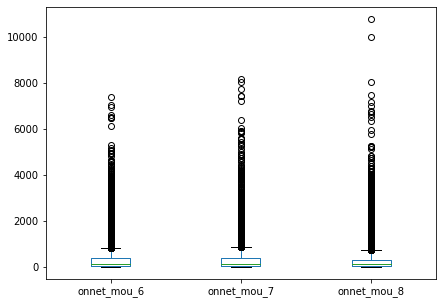

In [69]:
country_data_box_plot = churn_data_hcv_reduced_outlier[["onnet_mou_6","onnet_mou_7","onnet_mou_8"]].copy()
country_data_box_plot.plot(kind='box', figsize=(7,5))
plt.show()

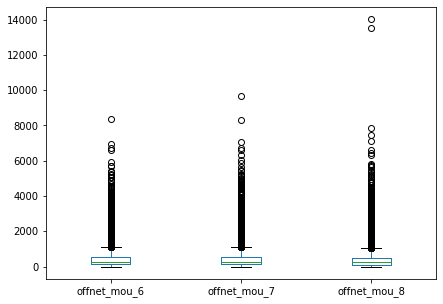

In [70]:
country_data_box_plot = churn_data_hcv_reduced_outlier[["offnet_mou_6","offnet_mou_7","offnet_mou_8"]].copy()
country_data_box_plot.plot(kind='box', figsize=(7,5))
plt.show()

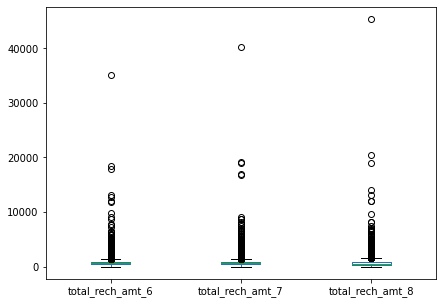

In [82]:
country_data_box_plot = churn_data_hcv_reduced_outlier[["total_rech_amt_6","total_rech_amt_7","total_rech_amt_8"]].copy()
country_data_box_plot.plot(kind='box', figsize=(7,5))
plt.show()

**Note how all numerical columns above have significant number of outliers**

In [155]:
churn_data_hcv_outlier_treated = churn_data_hcv_reduced_outlier.copy()

#**Outlier assessment insights:**


*   There are significant number of outliers across all columns, and outliers can significantly impact the result of clustering. 
*   Thus we would be imputing outliers through normal curve, i.e. impute any value which is greater than +/- 3 standard deviation from mean to the 3 standard deviation boundary.
*   We are not dropping outliers because this may result in dropping of countries with highest "child mortality" or "lowest life expectancy". These are the countries which actually are in dire need of aid, and thus dropping outliers would adversely impact business objective.

**Statistical outlier treatment:** Imputing any outlier which is beyond interquartile range, to interquartile range boundaries: median +/- (2.698 * Standard Deviation).
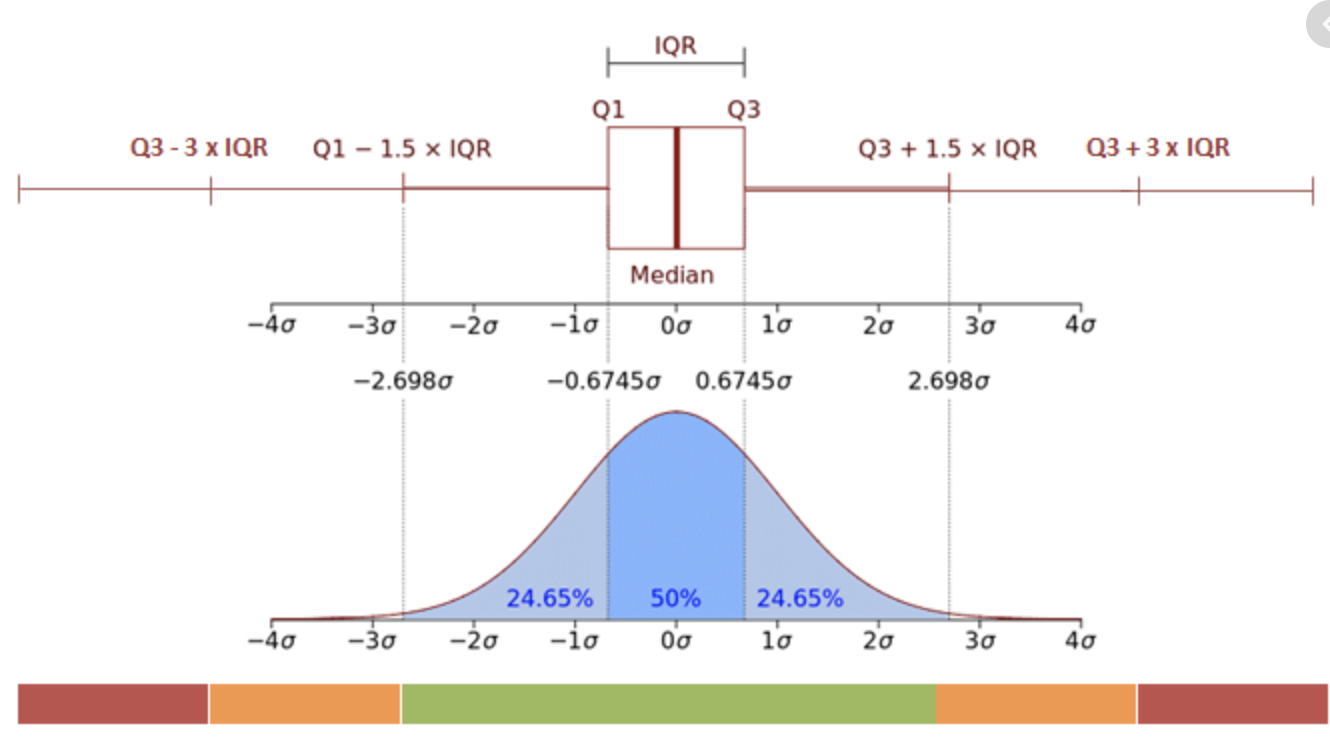


In [156]:
data_columns = numeric_columns
for i in data_columns:
  churn_data_hcv_outlier_treated[i].loc[churn_data_hcv_outlier_treated[i] > ((2.698 * churn_data_hcv_outlier_treated[i].std()) + churn_data_hcv_outlier_treated[i].median())] = ((2.698 * churn_data_hcv_outlier_treated[i].std()) + churn_data_hcv_outlier_treated[i].median())
  churn_data_hcv_outlier_treated[i].loc[churn_data_hcv_outlier_treated[i] < ((churn_data_hcv_outlier_treated[i].median()) - (2.698 * churn_data_hcv_outlier_treated[i].std()))] = (churn_data_hcv_outlier_treated[i].median()-(2.698 * churn_data_hcv_outlier_treated[i].std()))

# **Visualising box plots for a sample of numerical columns pre vs post outlier treatment**

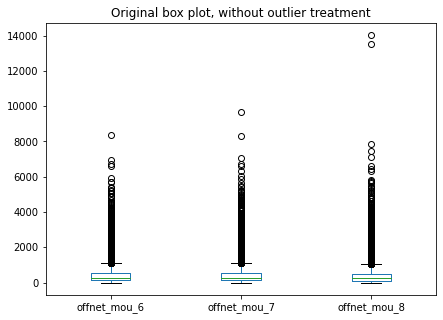

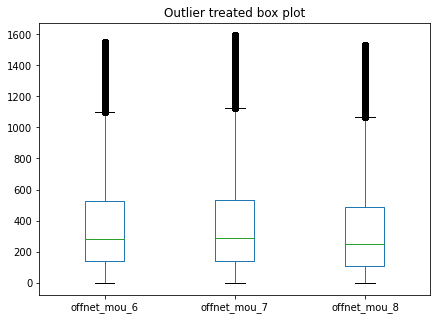

In [77]:
country_data_box_plot = churn_data_hcv_reduced_outlier[["offnet_mou_6","offnet_mou_7","offnet_mou_8"]].copy()
country_data_box_plot.plot(kind='box', figsize=(7,5))
plt.title("Original box plot, without outlier treatment")
plt.show()

country_data_box_plot = churn_data_hcv_outlier_treated[["offnet_mou_6","offnet_mou_7","offnet_mou_8"]].copy()
country_data_box_plot.plot(kind='box', figsize=(7,5))
plt.title("Outlier treated box plot")
plt.show()

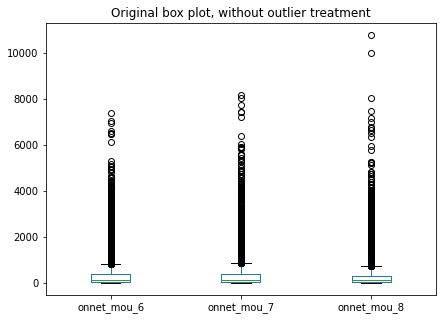

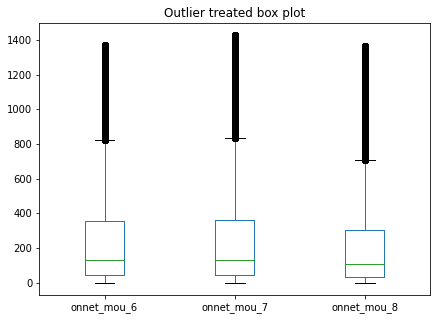

In [83]:
country_data_box_plot = churn_data_hcv_reduced_outlier[["onnet_mou_6","onnet_mou_7","onnet_mou_8"]].copy()
country_data_box_plot.plot(kind='box', figsize=(7,5))
plt.title("Original box plot, without outlier treatment")
plt.show()

country_data_box_plot = churn_data_hcv_outlier_treated[["onnet_mou_6","onnet_mou_7","onnet_mou_8"]].copy()
country_data_box_plot.plot(kind='box', figsize=(7,5))
plt.title("Outlier treated box plot")
plt.show()

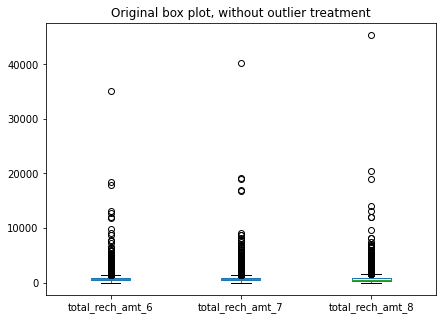

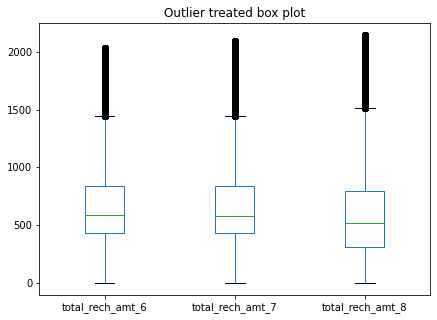

In [84]:
country_data_box_plot = churn_data_hcv_reduced_outlier[["total_rech_amt_6","total_rech_amt_7","total_rech_amt_8"]].copy()
country_data_box_plot.plot(kind='box', figsize=(7,5))
plt.title("Original box plot, without outlier treatment")
plt.show()

country_data_box_plot = churn_data_hcv_outlier_treated[["total_rech_amt_6","total_rech_amt_7","total_rech_amt_8"]].copy()
country_data_box_plot.plot(kind='box', figsize=(7,5))
plt.title("Outlier treated box plot")
plt.show()

**Plotting month wise correlation chart with target variable, for analysis**

In [91]:
numeric_columns_6 = [col for col in numeric_columns if '_6' in col]
print(numeric_columns_6)

['onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_t2c_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_t2o_mou_6', 'std_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6', 'arpu_2g_6', 'arpu_3g_6', 'arpu_6', 'av_rech_amt_data_6', 'last_day_rch_amt_6', 'max_rech_amt_6', 'max_rech_data_6', 'total_ic_mou_6', 'total_og_mou_6', 'total_rech_amt_6', 'total_rech_data_6', 'total_rech_num_6', 'vol_2g_mb_6', 'vol_3g_mb_6', 'avg_rech_amt_6_7']


**Correlation heatmap of month 6 variables with target column**

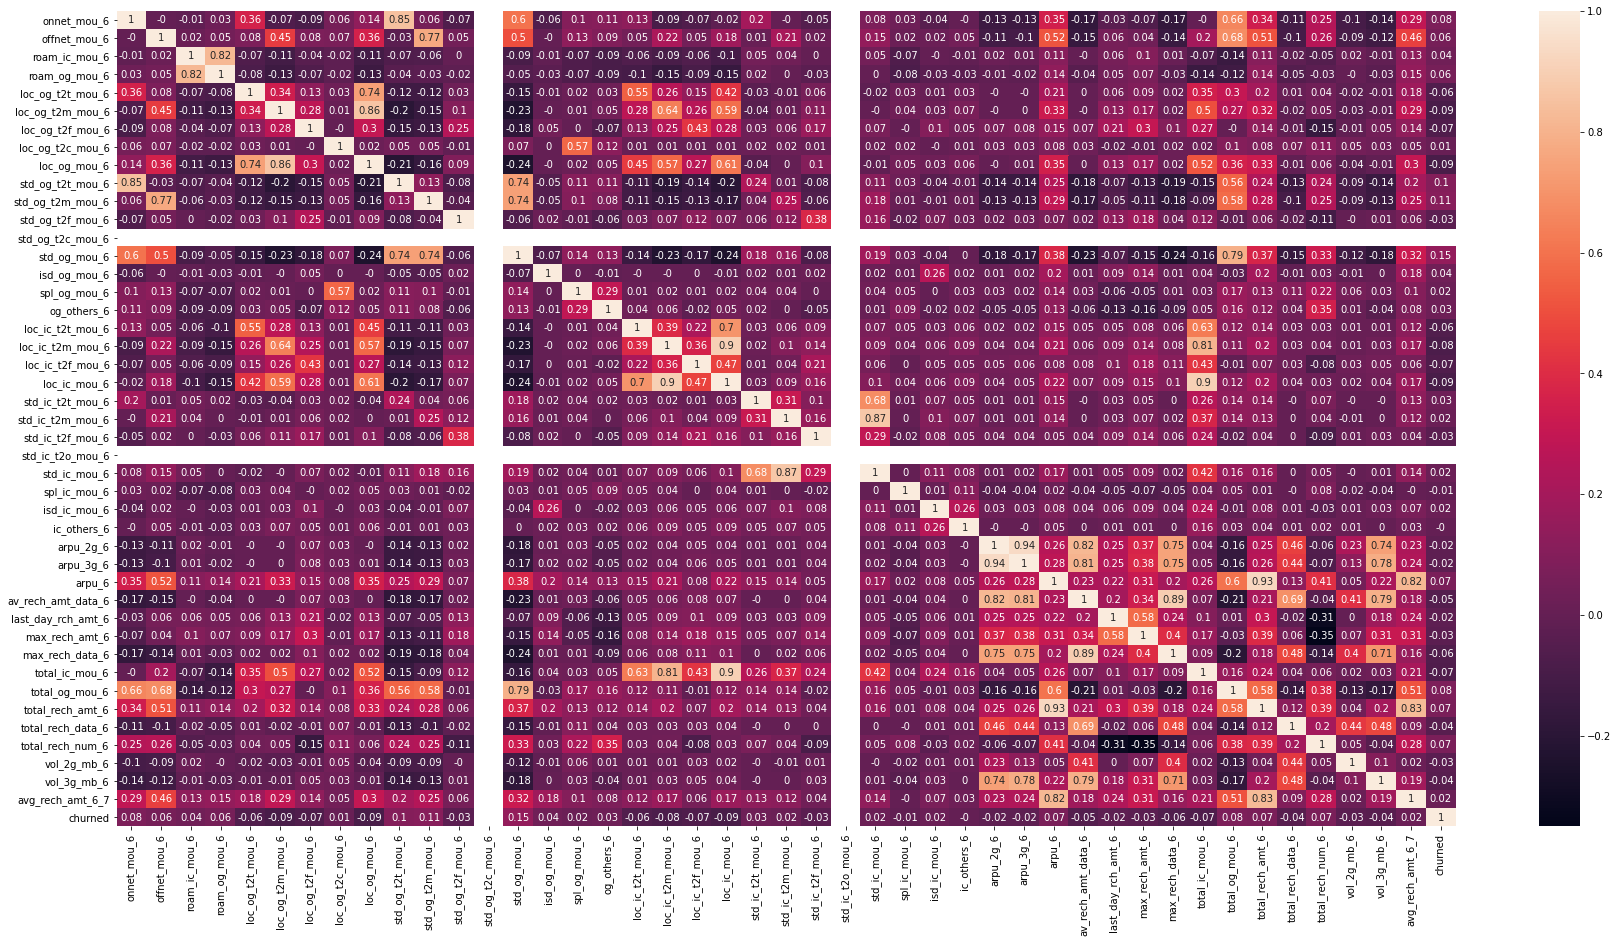

In [95]:
numeric_columns_6 = [col for col in numeric_columns if '_6' in col]
numeric_columns_6.append('churned')
correlation_matrix = churn_data_hcv_outlier_treated[numeric_columns_6].corr().round(2)

#overlaying heatmap on top of correlation matrix
# annot = True to print the values inside the square
fig, ax = plt.subplots(figsize=(30,15))
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, ax=ax)

**Found some columns with all zeroes (white blank columns/rows in heatmap), dropping them**

In [102]:
churn_data_hcv_outlier_treated[['std_ic_t2o_mou_6','std_og_t2c_mou_6']].describe()

std_ic_t2o_mou_6  std_og_t2c_mou_6
count           30011.0           30011.0
mean                0.0               0.0
std                 0.0               0.0
min                 0.0               0.0
25%                 0.0               0.0
50%                 0.0               0.0
75%                 0.0               0.0
max                 0.0               0.0

In [158]:
churn_data_hcv_outlier_treated = churn_data_hcv_outlier_treated.drop(['std_ic_t2o_mou_6','std_og_t2c_mou_6'],axis=1)

**Correlation heatmap of month 7 variables with target column**

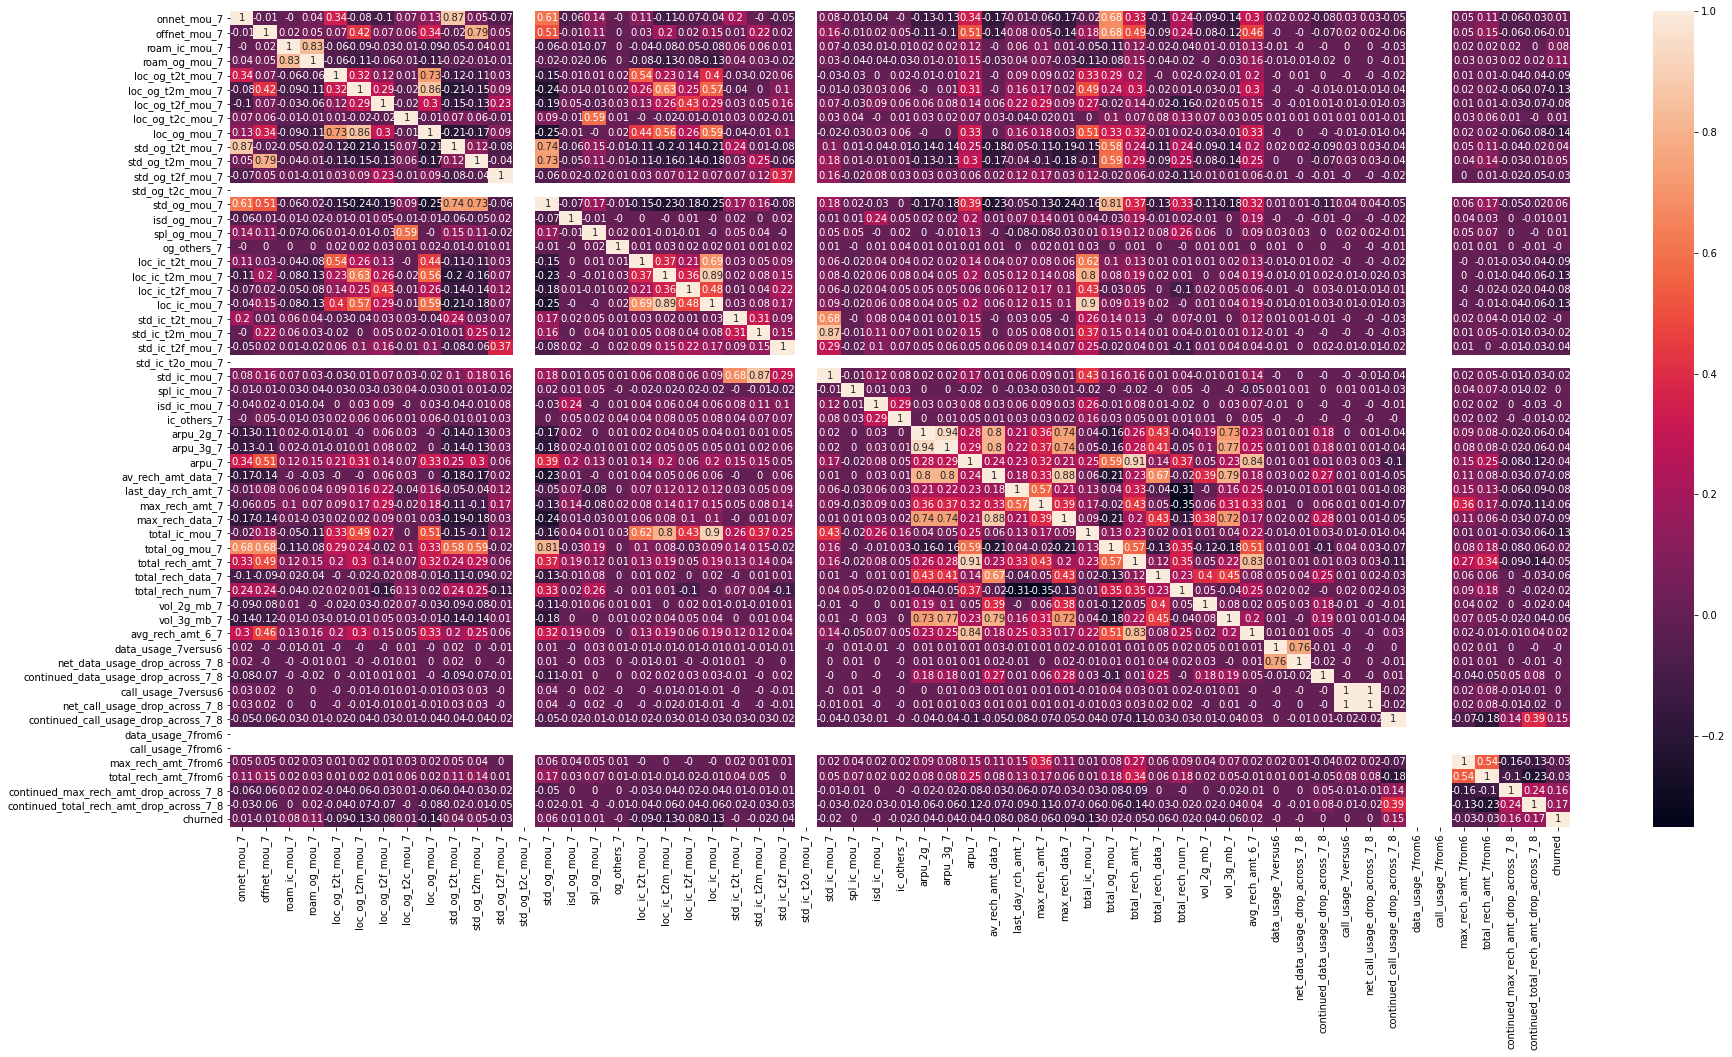

In [96]:
numeric_columns_7 = [col for col in numeric_columns if '_7' in col]
numeric_columns_7.append('churned')
correlation_matrix = churn_data_hcv_outlier_treated[numeric_columns_7].corr().round(2)

#overlaying heatmap on top of correlation matrix
# annot = True to print the values inside the square
fig, ax = plt.subplots(figsize=(30,15))
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, ax=ax)

**Found some columns with all zeroes (white blank columns/rows in heatmap), dropping them**

In [104]:
churn_data_hcv_outlier_treated[['std_ic_t2o_mou_7','std_og_t2c_mou_7','data_usage_7from6','call_usage_7from6']].describe()

std_ic_t2o_mou_7  std_og_t2c_mou_7  data_usage_7from6  \
count           30011.0           30011.0            30011.0   
mean                0.0               0.0                0.0   
std                 0.0               0.0                0.0   
min                 0.0               0.0                0.0   
25%                 0.0               0.0                0.0   
50%                 0.0               0.0                0.0   
75%                 0.0               0.0                0.0   
max                 0.0               0.0                0.0   

       call_usage_7from6  
count            30011.0  
mean                 0.0  
std                  0.0  
min                  0.0  
25%                  0.0  
50%                  0.0  
75%                  0.0  
max                  0.0

In [159]:
churn_data_hcv_outlier_treated = churn_data_hcv_outlier_treated.drop(['std_ic_t2o_mou_7','std_og_t2c_mou_7','data_usage_7from6','call_usage_7from6'],axis=1)

**Correlation heatmap of month 8 variables with target column**

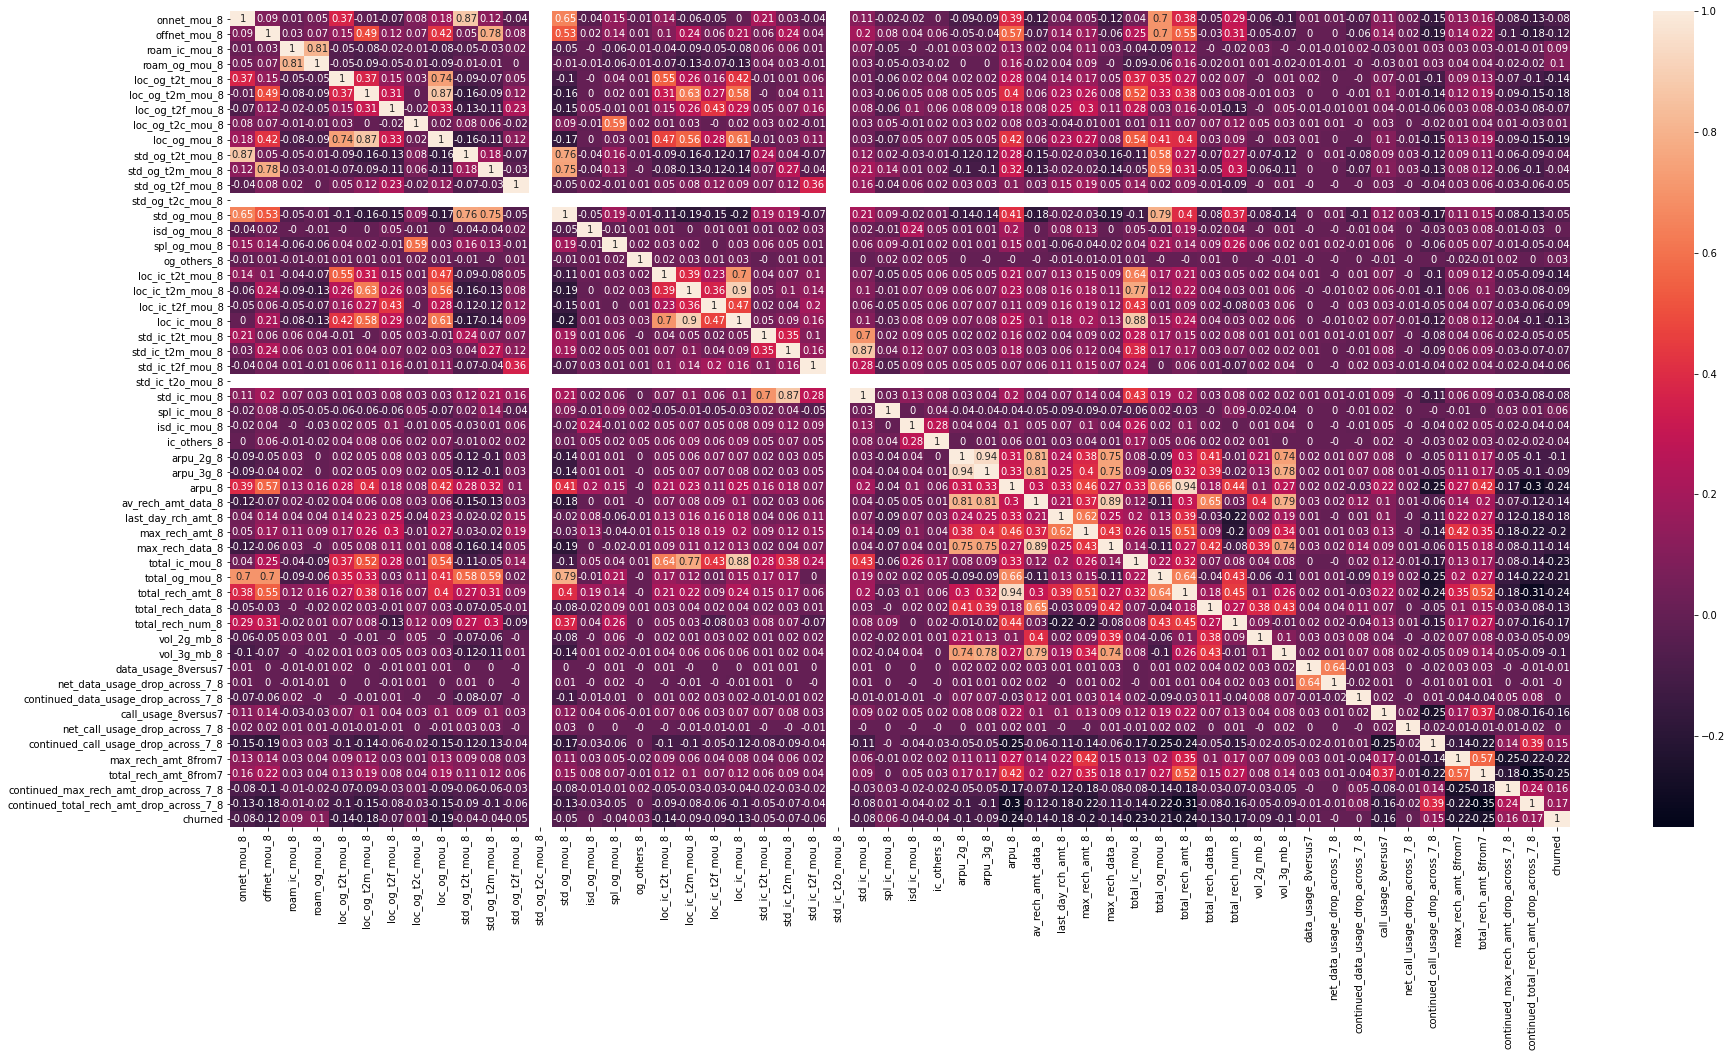

In [97]:
numeric_columns_8 = [col for col in numeric_columns if '_8' in col]
numeric_columns_8.append('churned')
correlation_matrix = churn_data_hcv_outlier_treated[numeric_columns_8].corr().round(2)

#overlaying heatmap on top of correlation matrix
# annot = True to print the values inside the square
fig, ax = plt.subplots(figsize=(30,15))
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, ax=ax)

**Found some columns with all zeroes (white blank columns/rows in heatmap), dropping them**

In [106]:
churn_data_hcv_outlier_treated[['std_ic_t2o_mou_8','std_og_t2c_mou_8']].describe()

std_ic_t2o_mou_8  std_og_t2c_mou_8
count           30011.0           30011.0
mean                0.0               0.0
std                 0.0               0.0
min                 0.0               0.0
25%                 0.0               0.0
50%                 0.0               0.0
75%                 0.0               0.0
max                 0.0               0.0

In [160]:
churn_data_hcv_outlier_treated = churn_data_hcv_outlier_treated.drop(['std_ic_t2o_mou_8','std_og_t2c_mou_8'],axis=1)

# **Insights from correlation analysis:**
1.   Significant correlation between independent variables observed
2.   Derived features like 'max recharge amount', 'total recharge amount', 'total outgoing mou', 'max data recharge' etc. of 8th month vs 7th month observes drop and is singificantly correlated with target variable. This also proves our hypothesis that customers reduce spending on the service as they move closer to churn.



**Dummy encoding categorical variables**
drop_first is set to 'True' to drop 1st dummy column for every variable which is dummy encoded.

In [161]:
churn_data_with_dummies = pd.get_dummies(churn_data_hcv_outlier_treated,drop_first=True).copy()
churn_data_with_dummies.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  onnet_mou_6  onnet_mou_7  \
0             0.0             0.0             0.0        57.84        54.68   
1             0.0             0.0             0.0       413.69       351.03   
2             0.0             0.0             0.0       501.76       108.39   
3             0.0             0.0             0.0        50.51        74.01   
4             0.0             0.0             0.0      1185.91         9.28   

   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0        52.29        453.43        567.16        325.91          16.23   
1        35.08         94.66         80.63        136.48           0.00   
2       534.24        413.31        119.28        482.46          23.53   
3        70.61        296.29        229.74        162.76           0.00   
4         7.79         61.64          0.00          5.54           0.00   

   roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0          33.49          31.64          23.74          12.59          38.06   
1           0.00           0.00           0.00           0.00           0.00   
2         144.24          72.11           7.98          35.26           1.44   
3           2.83           0.00           0.00          17.74           0.00   
4           4.76           4.81           0.00           8.46          13.34   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0             51.39             31.38             40.28            308.63   
1            297.13            217.59             12.49             80.96   
2             49.63              6.19             36.01            151.13   
3             42.61             65.16             67.38            273.29   
4             38.99              0.00              0.00             58.54   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0            447.38            162.28         61.548188             55.14   
1             70.58             50.54          0.000000              0.00   
2             47.28            294.46          4.540000              0.00   
3            145.99            128.28          0.000000              4.48   
4              0.00              0.00          0.000000              0.00   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0             53.23               0.0               0.0              0.00   
1              0.00               0.0               0.0              7.15   
2             23.51               0.0               0.0              0.49   
3             10.26               0.0               0.0              0.00   
4              0.00               0.0               0.0              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0        422.16        533.91        255.79          4.300000   
1        378.09        288.18         63.04        116.560000   
2        205.31         53.48        353.99        446.410000   
3        315.91        215.64        205.93          7.890000   
4         97.54          0.00          0.00       1120.021479   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0             23.29             12.01             49.89             31.76   
1            133.43             22.58             13.69             10.04   
2             85.98            498.23            255.36             52.94   
3              2.58              3.23             22.99             64.51   
4              0.81              0.00              1.55              0.00   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0             49.14              6.66             20.08             16.68   
1             75.69              0.00              0.00              0.00   
2            156.94              0.00              0.00              0.00   
3             18.29              0.00        

**Dropping some more columns with all zeroes**

In [111]:
churn_data_with_dummies[['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou']].describe()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou
count         30011.0         30011.0         30011.0
mean              0.0             0.0             0.0
std               0.0             0.0             0.0
min               0.0             0.0             0.0
25%               0.0             0.0             0.0
50%               0.0             0.0             0.0
75%               0.0             0.0             0.0
max               0.0             0.0             0.0

In [162]:
churn_data_with_dummies = churn_data_with_dummies.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'],axis=1)

In [163]:
churn_data_with_dummies = churn_data_with_dummies.drop(['call_usage_7versus6','net_call_usage_drop_across_7_8'],axis=1)

In [164]:
churn_data_with_dummies.head()

onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
0        57.84        54.68        52.29        453.43        567.16   
1       413.69       351.03        35.08         94.66         80.63   
2       501.76       108.39       534.24        413.31        119.28   
3        50.51        74.01        70.61        296.29        229.74   
4      1185.91         9.28         7.79         61.64          0.00   

   offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
0        325.91          16.23          33.49          31.64          23.74   
1        136.48           0.00           0.00           0.00           0.00   
2        482.46          23.53         144.24          72.11           7.98   
3        162.76           0.00           2.83           0.00           0.00   
4          5.54           0.00           4.76           4.81           0.00   

   roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
0          12.59          38.06             51.39             31.38   
1           0.00           0.00            297.13            217.59   
2          35.26           1.44             49.63              6.19   
3          17.74           0.00             42.61             65.16   
4           8.46          13.34             38.99              0.00   

   loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0             40.28            308.63            447.38            162.28   
1             12.49             80.96             70.58             50.54   
2             36.01            151.13             47.28            294.46   
3             67.38            273.29            145.99            128.28   
4              0.00             58.54              0.00              0.00   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
0         61.548188             55.14             53.23               0.0   
1          0.000000              0.00              0.00               0.0   
2          4.540000              0.00             23.51               0.0   
3          0.000000              4.48             10.26               0.0   
4          0.000000              0.00              0.00               0.0   

   loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  \
0               0.0              0.00        422.16        533.91   
1               0.0              7.15        378.09        288.18   
2               0.0              0.49        205.31         53.48   
3               0.0              0.00        315.91        215.64   
4               0.0              0.00         97.54          0.00   

   loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  \
0        255.79          4.300000             23.29             12.01   
1         63.04        116.560000            133.43             22.58   
2        353.99        446.410000             85.98            498.23   
3        205.93          7.890000              2.58              3.23   
4          0.00       1120.021479              0.81              0.00   

   std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  \
0             49.89             31.76             49.14              6.66   
1             13.69             10.04             75.69              0.00   
2            255.36             52.94            156.94              0.00   
3             22.99             64.51             18.29              0.00   
4              1.55              0.00              0.00              0.00   

   std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  std_og_mou_7  \
0             20.08             16.68         60.86         75.14   
1              0.00              0.00        130.26        143.48   
2              0.00              0.00        701.78        138.93   
3              0.00              0.00         30.89         67.09   
4              0.00              0.00       1148.46          0.81   

   std_og_

In [165]:
print("shape of dataframe before dummy encoding:",churn_data_hcv_outlier_treated.shape)

shape of dataframe before dummy encoding: (30011, 164)


In [166]:
print("shape of dataframe after dummy encoding:",churn_data_with_dummies.shape)

shape of dataframe after dummy encoding: (30011, 204)


**Train test split**

In [168]:
churn_xbase = churn_data_with_dummies.copy().drop(['churned'],axis=1)
churn_ybase = churn_data_with_dummies.copy()['churned']
x_train, x_test, y_train, y_test = train_test_split(churn_xbase, churn_ybase, test_size=0.20, random_state=42)

**Extracting numerical columns for scaling**

In [169]:
num_columns = [col for col in churn_data_with_dummies.columns if not 'cat_' in col]
num_columns.remove('churned')
print(num_columns)

['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic

In [170]:
x_train[num_columns].describe()

onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  \
count  24008.000000  24008.000000  24008.000000  24008.000000  24008.000000   
mean     273.333689    280.272971    247.371842    399.489985    404.049097   
std      348.176432    361.642535    337.819436    370.452589    377.758432   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       42.230000     42.160000     32.987500    141.297500    139.305000   
50%      127.740000    127.715000    107.810000    282.885000    283.660000   
75%      353.550000    360.475000    302.662500    526.380000    534.595000   
max     1371.864515   1426.460090   1366.566486   1554.139781   1593.497604   

       offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
count  24008.000000   24008.000000   24008.000000   24008.000000   
mean     361.974103      13.411742       9.771531       9.740330   
std      361.561747      40.454739      34.135987      33.564477   
min        0.000000       0.000000       0.000000       0.000000   
25%      105.280000       0.000000       0.000000       0.000000   
50%      247.285000       0.000000       0.000000       0.000000   
75%      489.745000       0.000000       0.000000       0.000000   
max     1532.540428     213.754926     205.905200     201.130112   

       roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
count   24008.000000   24008.000000   24008.000000      24008.000000   
mean       23.060241      16.172129      16.188501         81.342274   
std        65.428368      50.744590      51.832778        130.014542   
min         0.000000       0.000000       0.000000          0.000000   
25%         0.000000       0.000000       0.000000          8.810000   
50%         0.000000       0.000000       0.000000         33.490000   
75%         0.000000       0.000000       0.000000         92.045000   
max       320.178853     264.193882     286.650298        673.249138   

       loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
count      24008.000000      24008.000000      24008.000000      24008.000000   
mean          82.025747         75.386863        170.474587        170.535187   
std          131.484236        123.460516        189.824468        185.530309   
min            0.000000          0.000000          0.000000          0.000000   
25%            9.580000          6.607500         31.480000         34.705000   
50%           34.130000         30.010000        101.900000        104.190000   
75%           91.937500         84.867500        241.095000        238.472500   
max          702.996247        662.673424        776.591624        753.052514   

       loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
count      24008.000000      24008.000000      24008.000000      24008.000000   
mean         158.339943          5.882619          6.011554          5.592512   
std          179.844039         12.426002         12.537799         11.470785   
min            0.000000          0.000000          0.000000          0.000000   
25%           27.260000          0.000000          0.000000          0.000000   
50%           91.755128          0.400000          0.460000          0.400000   
75%          225.940000          5.110000          5.315000          5.303333   
max          723.454067         61.548188         61.419120         54.948436   

       loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
count      24008.000000      24008.000000      24008.000000  24008.000000   
mean           1.251270          1.520086          1.438037    266.276293   
std            3.492607          4.260684          3.783031    287.352638   
min            0.000000          0.000000          0.000000      0.000000   
25%            0.000000          0.000000          0.000000     52.880000   
50%            0.000000          0.000000          0.000000    166.910000   
75%            0.000000          0.

**Fitting on train data and scaling/transforming continuous variables in training data**

In [171]:
scaler =  StandardScaler() #MinMaxScaler()

x_train[num_columns] = scaler.fit_transform(x_train[num_columns])
x_train[num_columns].head()

onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
29931    -0.660896     1.142138    -0.732276     -0.744726      0.721987   
2210      3.155164     3.169458     3.313066      0.181593     -0.314014   
14242    -0.735975     0.085548    -0.419055      1.631876      1.392535   
23114    -0.774490    -0.625197    -0.702940      3.116927      3.148767   
11418     0.330461     0.252290     0.225741     -0.962626     -0.858686   

       offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
29931     -1.001161      -0.331532      -0.286259      -0.290204   
2210      -0.507985      -0.331532      -0.080900      -0.290204   
14242     -0.006622      -0.331532       1.262286       3.256477   
23114      1.228767      -0.331532      -0.286259       4.437512   
11418     -0.841268      -0.331532      -0.286259      -0.204397   

       roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
29931      -0.352458      -0.318703      -0.312328         -0.625653   
2210       -0.352458       1.149661      -0.312135          3.706953   
14242      -0.352458       4.647644       2.564483         -0.494203   
23114      -0.352458      -0.318703       0.096881         -0.597348   
11418      -0.352458      -0.318703      -0.152966         -0.585733   

       loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
29931         -0.623858         -0.610628         -0.869846         -0.906368   
2210           2.744905          1.140009          0.054080         -0.499256   
14242          1.153122          0.238730         -0.806207         -0.463143   
23114         -0.455165         -0.551822          0.485751          1.154524   
11418         -0.623858         -0.610628         -0.809262         -0.706666   

       loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
29931         -0.880448         -0.473422         -0.479484         -0.487554   
2210          -0.225756         -0.414673          0.372357         -0.487554   
14242         -0.843804         -0.473422         -0.479484         -0.487554   
23114          0.722586          1.939311          0.317323          0.766963   
11418         -0.786586         -0.473422         -0.479484         -0.487554   

       loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
29931         -0.358270         -0.356778         -0.380136     -0.908019   
2210           1.969552          0.542157          1.123980      1.665249   
14242          0.008226         -0.356778         -0.380136     -0.806469   
23114         -0.358270         -0.197176         -0.380136      0.104625   
11418          0.718312          0.577364          2.781416     -0.849901   

       loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
29931     -0.935767     -0.898915         -0.415389          1.658078   
2210       0.932451      0.314454          3.198772          3.183420   
14242      0.179480     -0.493853         -0.560487         -0.563533   
23114      0.527774      0.227525         -0.560487         -0.461544   
11418     -0.804958     -0.837571          0.725659          0.626649   

       std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
29931         -0.529372         -0.211020          1.555177         -0.574894   
2210           3.369794          0.326925         -0.028038         -0.380289   
14242         -0.526060          2.670117          1.430898          0.147373   
23114         -0.520133          3.314452          3.311244          1.136077   
11418          0.596022         -0.594420         -0.545527         -0.560314   

       std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  \
29931         -0.263112         -0.258884         -0.256482     -0.423349   
2210          -0.263112         -0.258884         -0.256482      2.864689   
14242         -0.263112         -0.192715         -0.256482      1.225511   
23114         -0.263112         -0.25

**Not fitting on test data and just scaling/transforming continuous variables in test data**

In [172]:
x_test[num_columns] = scaler.transform(x_test[num_columns])
x_test[num_columns].head()

onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  \
11959    -0.309027    -0.041321    -0.093193     -0.718865     -0.769712   
24283     3.155164     3.169458    -0.604424     -0.231370     -0.773895   
23984     3.155164     2.007292     3.313066      1.251306      0.726169   
28140    -0.073682    -0.033633     0.583040     -0.409913     -0.138078   
16635    -0.657162     2.716654     2.164036     -0.997611     -0.168786   

       offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
11959     -0.522008       0.656754      -0.286259      -0.290204   
24283     -0.989047      -0.331532      -0.083829      -0.290204   
23984      0.901154       3.467361       4.792944       3.211488   
28140      0.037659       3.301246      -0.286259      -0.290204   
16635      0.212654      -0.331532      -0.286259      -0.290204   

       roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
11959      -0.109744      -0.318703      -0.312328         -0.503433   
24283      -0.352458       0.642010       0.655419         -0.334064   
23984       4.541223       4.887751       5.218077         -0.625653   
28140       1.526125      -0.318703      -0.312328          0.152276   
16635      -0.352458      -0.318703      -0.312328         -0.576196   

       loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
11959         -0.314385         -0.453975         -0.663756         -0.650825   
24283         -0.453187         -0.610628         -0.355149         -0.787732   
23984         -0.623858         -0.610628         -0.898083         -0.919196   
28140          0.395145          0.396274         -0.175084          0.648936   
16635          1.920683          1.416702         -0.859573         -0.787193   

       loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
11959         -0.409252         -0.368800         -0.189156         -0.487554   
24283         -0.880448         -0.338219         -0.479484         -0.487554   
23984         -0.300989         -0.473422         -0.479484         -0.166732   
28140          0.757839          1.328482          1.246532          2.117379   
16635         -0.612210         -0.473422         -0.401319         -0.414323   

       loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
11959          0.761261          0.490521          1.665885     -0.712019   
24283         -0.358270         -0.232382         -0.380136     -0.430199   
23984         -0.358270         -0.356778         -0.380136     -0.926673   
28140         -0.358270         -0.356778          1.015599     -0.019093   
16635         -0.358270         -0.356778         -0.380136     -0.878856   

       loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
11959     -0.611799     -0.520637         -0.058669          0.155871   
24283     -0.778796     -0.898915          3.198772          3.183420   
23984     -0.944169     -0.506827          1.196598         -0.564110   
28140      0.632456      0.732199         -0.371890         -0.134199   
16635      0.326988      0.189112         -0.432641          2.410752   

       std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
11959          0.155856         -0.387909         -0.430887         -0.274685   
24283         -0.529372          0.094312         -0.350336         -0.574894   
23984          3.369794         -0.477250         -0.611651          0.258687   
28140          0.586330         -0.454263         -0.485347         -0.412463   
16635          2.009154         -0.534769          0.399840          0.807703   

       std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_mou_6  \
11959         -0.185397          0.251567         -0.256482     -0.312248   
24283         -0.263112         -0.258884         -0.256482      2.864689   
23984         -0.263112         -0.258884         -0.256482      0.396427   
28140         -0.263112         -0.25

# **Running recurcive feature elimination with cross validation**

**subsetting data as RFECV on entire datasets is taking hours in running and still not returning results**

In [192]:
x_train_subset = x_train[0:10000].copy()
y_train_subset = y_train[0:10000].copy()

x_train_subset.shape

(10000, 203)

In [193]:
X = x_train_subset
target = y_train_subset

rfc =  RandomForestClassifier(random_state=101,class_weight="balanced") #choosing class_weight parameter as "balanced" as it is the target variable is highly imbalanced
rfecv2 = RFECV(estimator=rfc, step=2, cv=StratifiedKFold(3), scoring='accuracy',min_features_to_select = 80,n_jobs=5) #Increasing number of jobs for parallelism and increasing feature seletion speed
rfecv2.fit(X, target)

RFECV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                       class_weight='balanced',
                                       criterion='gini', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=101,
                                       verbose=0, warm_start=False),
      min_features_to_select=80, n_jobs=5, scoring='accuracy', step=2,
      verbose=0)

**Optimal number of features as per RFECV = 89, includes derived features**

In [195]:
print('Optimal number of features: {}'.format(rfecv2.n_features_))

Optimal number of features: 89


**Dropping features from x_train in line with RFECV output**

In [237]:
print(np.where(rfecv2.support_ == False)[0])
X = x_train

X.drop(X.columns[np.where(rfecv2.support_ == False)[0]], axis=1, inplace=True)

[  6   9  19  21  22  23  33  34  35  39  40  41  45  46  47  55  66  67
  68  72  73  74  75  76  77  78  79  80  82  83  84  85  86  87  92  93
  95  96 103 104 106 116 117 118 122 123 125 126 130 131 134 136 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202]


**Dropping features from x_test as well, in line with RFECV output**

In [248]:
x_test.drop(x_test.columns[np.where(rfecv2.support_ == False)[0]], axis=1, inplace=True)

**Plotting feature importance of retained features**

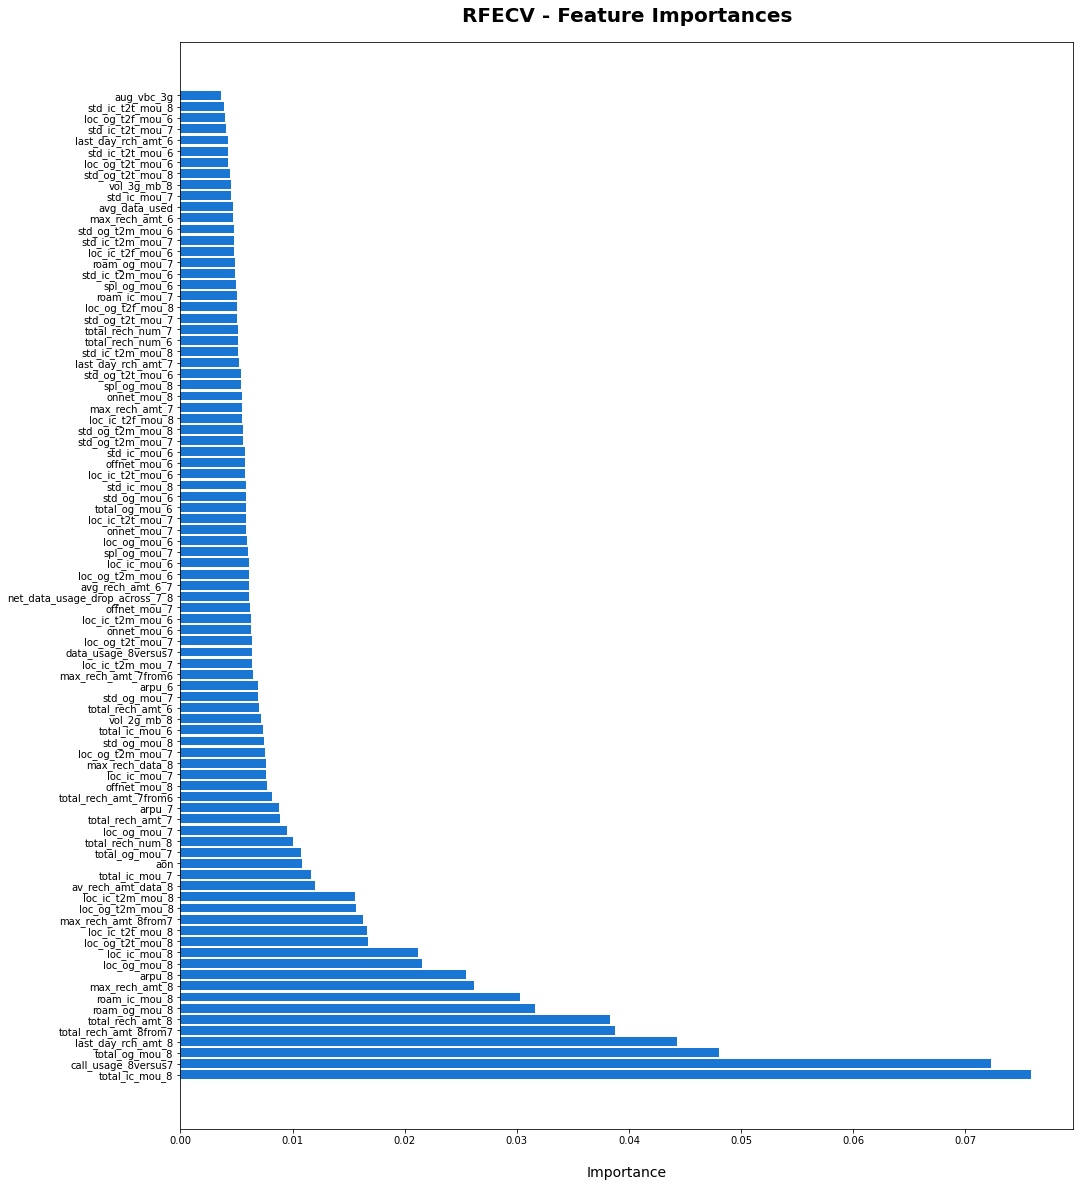

In [240]:
dset = pd.DataFrame()
dset['attr'] = X.columns
dset['importance'] = rfecv2.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 20))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

**Shape of training data after RFE: Note that number of columns/features are reduced to**

In [241]:
x_train.shape

(24008, 89)

**Building an explainable statsmodel logistic refression model.**

In [242]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,x_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.638205
         Iterations 7
                                Results: Logit
Model:                    Logit                Pseudo R-squared:     -1.176    
Dependent Variable:       churned              AIC:                  30822.0660
Date:                     2020-11-30 16:29     BIC:                  31541.7327
No. Observations:         24008                Log-Likelihood:       -15322.   
Df Model:                 88                   LL-Null:              -7041.9   
Df Residuals:             23919                LLR p-value:          1.0000    
Converged:                1.0000               Scale:                1.0000    
No. Iterations:           7.0000                                               
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------

In [267]:
vif_estimation_data_frame = add_constant(x_train)
vif = pd.Series([variance_inflation_factor(vif_estimation_data_frame.values, i) 
               for i in range(vif_estimation_data_frame.shape[1])], 
              index=vif_estimation_data_frame.columns)
vif_df = pd.DataFrame(vif)

#renaming dataframe column for better interpretability
vif_df.rename(columns = {0:'vif_value'}, inplace = True) 

#converting indexs (column names) into a dataframe columns
vif_df = vif_df.reset_index()
vif_df.head()
#renaming newly creating index column for better interpretability
vif_df.rename(columns = {'index':'col_names'}, inplace = True) 
vif_df = vif_df.sort_values(by='vif_value',ascending=False)
vif_df.head(10)

col_names  vif_value
29      std_og_mou_7  93.260948
20      loc_og_mou_7  77.880234
81  avg_rech_amt_6_7  71.545189
28      std_og_mou_6  71.138654
21      loc_og_mou_8  70.124265
43      loc_ic_mou_7  69.983491
19      loc_og_mou_6  69.583067
42      loc_ic_mou_6  69.067882
44      loc_ic_mou_8  67.043815
30      std_og_mou_8  65.129784

In [269]:
vif_estimation_data_frame = add_constant(x_train_pruned)
vif = pd.Series([variance_inflation_factor(vif_estimation_data_frame.values, i) 
               for i in range(vif_estimation_data_frame.shape[1])], 
              index=vif_estimation_data_frame.columns)
vif_df = pd.DataFrame(vif)

#renaming dataframe column for better interpretability
vif_df.rename(columns = {0:'vif_value'}, inplace = True) 

#converting indexs (column names) into a dataframe columns
vif_df = vif_df.reset_index()
vif_df.head()
#renaming newly creating index column for better interpretability
vif_df.rename(columns = {'index':'col_names'}, inplace = True) 
vif_df = vif_df.sort_values(by='vif_value',ascending=False)
vif_df.head(10)

col_names  vif_value
80  avg_rech_amt_6_7  71.542789
20      loc_og_mou_7  70.934008
21      loc_og_mou_8  69.844588
42      loc_ic_mou_7  69.652241
41      loc_ic_mou_6  69.023928
19      loc_og_mou_6  68.596569
43      loc_ic_mou_8  66.992780
28      std_og_mou_6  63.564092
2        onnet_mou_7  60.478444
29      std_og_mou_8  54.824255

**Trying sklearn's logistic regression model**

In [253]:
from sklearn.linear_model import LogisticRegression
sklearn_logit_model = LogisticRegression(random_state=0).fit(x_train, y_train)

In [254]:
from sklearn.metrics import r2_score
y_predict = sklearn_logit_model.predict(x_test)
print(r2_score(y_test, y_predict))

0.18458188431007527


In [257]:
print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      5476
           1       0.76      0.37      0.50       527

    accuracy                           0.93      6003
   macro avg       0.85      0.68      0.73      6003
weighted avg       0.93      0.93      0.92      6003

[[5414   62]
 [ 330  197]]


In [259]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

In [260]:
clf = RandomForestClassifier(n_jobs=-1)

param_grid = {
    'min_samples_split': [3, 5, 10], 
    'n_estimators' : [100, 300],
    'max_depth': [3, 5, 15, 25],
    'max_features': [3, 5, 10, 20]
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}


In [261]:
def grid_search_wrapper(refit_score='recall_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=10)
    grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)
    grid_search.fit(x_train.values, y_train.values)

    # make the predictions
    y_pred = grid_search.predict(x_test.values)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    return grid_search

In [262]:
grid_search_clf = grid_search_wrapper(refit_score='recall_score')

KeyboardInterrupt: ignored

**Performing PCA**

In [279]:
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

In [280]:
pca = PCA(random_state=100, svd_solver='randomized')
pca.fit_transform(x_train)

array([[-5.52862484e+00, -3.62079294e-01, -1.62417406e+00, ...,
        -1.49832398e-02, -6.58622827e-02, -6.35223461e-02],
       [ 6.33300912e+00,  1.06694769e+01,  3.92374817e+00, ...,
         9.84820805e-02, -1.39416383e-01, -3.08080869e-01],
       [-3.09058805e-01,  2.41289379e+00,  3.31395589e+00, ...,
        -1.82755004e-02,  4.08705644e-03, -8.15155208e-03],
       ...,
       [-4.34263419e+00,  4.61340917e-01,  9.64480580e-02, ...,
         2.25950704e-02, -1.36154609e-03,  4.34413269e-04],
       [ 9.56104087e-01,  1.52151142e+00,  4.02943334e+00, ...,
         1.96104304e-02,  1.07918244e-02,  1.00862486e-02],
       [-2.26752978e+00,  1.24613604e-01,  1.31545157e-01, ...,
        -2.13687031e-02,  1.32180935e-02,  1.16050594e-02]])

In [281]:
pca.components_.round(3)

array([[-0.003, -0.001,  0.013, ...,  0.034, -0.009,  0.042],
       [ 0.159,  0.183,  0.18 , ...,  0.021,  0.024,  0.01 ],
       [-0.102, -0.088, -0.066, ...,  0.035,  0.038,  0.067],
       ...,
       [-0.008,  0.023, -0.001, ..., -0.   ,  0.003,  0.001],
       [-0.044,  0.26 , -0.195, ..., -0.001,  0.001, -0.001],
       [-0.027,  0.21 , -0.095, ..., -0.003, -0.002, -0.001]])

In [282]:
colnames = list(x_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head(10)

PC1       PC2        Feature
0 -0.003082  0.158951    onnet_mou_6
1 -0.001304  0.183452    onnet_mou_7
2  0.013461  0.179585    onnet_mou_8
3  0.076697  0.139866   offnet_mou_6
4  0.078078  0.167111   offnet_mou_7
5  0.094390  0.159468   offnet_mou_8
6 -0.003126  0.015165  roam_ic_mou_7
7  0.003725  0.023458  roam_ic_mou_8
8 -0.016136  0.029228  roam_og_mou_7
9 -0.006709  0.037803  roam_og_mou_8

In [283]:
pca.explained_variance_ratio_.round(4)

array([1.653e-01, 1.301e-01, 7.100e-02, 6.170e-02, 5.260e-02, 4.430e-02,
       3.960e-02, 3.390e-02, 3.240e-02, 2.910e-02, 2.600e-02, 2.050e-02,
       1.870e-02, 1.730e-02, 1.610e-02, 1.580e-02, 1.460e-02, 1.240e-02,
       1.080e-02, 9.700e-03, 9.200e-03, 9.100e-03, 8.700e-03, 8.300e-03,
       8.100e-03, 6.900e-03, 6.700e-03, 6.700e-03, 6.500e-03, 6.400e-03,
       5.900e-03, 5.700e-03, 5.200e-03, 5.100e-03, 5.000e-03, 4.600e-03,
       4.400e-03, 4.300e-03, 3.800e-03, 3.700e-03, 3.600e-03, 3.400e-03,
       3.300e-03, 3.200e-03, 2.900e-03, 2.900e-03, 2.500e-03, 2.400e-03,
       2.300e-03, 2.100e-03, 1.900e-03, 1.800e-03, 1.700e-03, 1.600e-03,
       1.500e-03, 1.500e-03, 1.400e-03, 1.300e-03, 1.200e-03, 1.100e-03,
       1.100e-03, 1.000e-03, 1.000e-03, 7.000e-04, 6.000e-04, 6.000e-04,
       6.000e-04, 5.000e-04, 5.000e-04, 4.000e-04, 4.000e-04, 4.000e-04,
       3.000e-04, 3.000e-04, 2.000e-04, 2.000e-04, 2.000e-04, 2.000e-04,
       2.000e-04, 1.000e-04, 1.000e-04, 1.000e-04, 

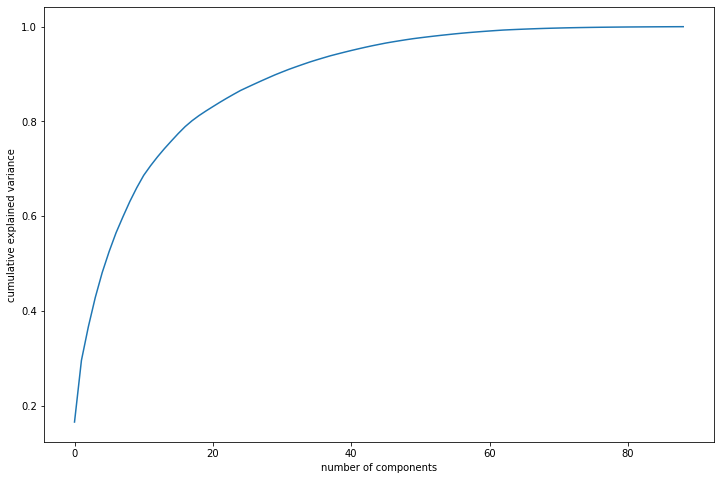

In [284]:
fig = plt.figure(figsize=(12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [285]:
pca_final = IncrementalPCA(n_components=89)
df_train_pca = pca_final.fit_transform(x_train)
df_train_pca.shape

(24008, 89)

In [286]:
pca_test_data = pca_final.transform(x_test)
pca_test_data.shape

(6003, 89)

In [288]:
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [289]:
logistic_regression = LogisticRegression()
logistic_model = logistic_regression.fit(df_train_pca, y_train)
predicted_proba = logistic_model.predict_proba(pca_test_data)[:, 1]
"{:2.2}".format(metrics.roc_auc_score(y_test, predicted_proba))

'0.9'

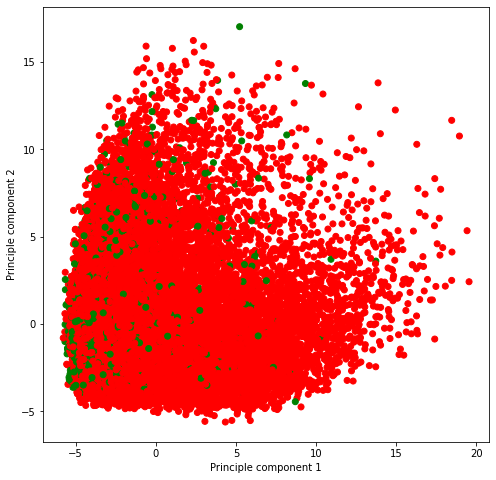

In [294]:
plt.figure(figsize=(8, 8))
plt.scatter(df_train_pca[:, 0], df_train_pca[:, 1], c= y_train.map({0: 'red', 1: 'green'}))
plt.xlabel('Principle component 1')
plt.ylabel('Principle component 2')
plt.show()

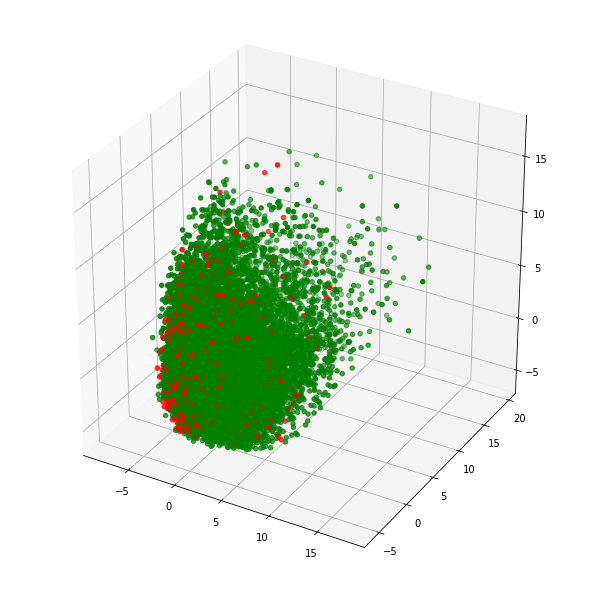

In [295]:
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
# ax = plt.axes(projection='3d')
ax.scatter(df_train_pca[:,2], df_train_pca[:,0], df_train_pca[:,1], c=y_train.map({0:'green',1:'red'}))

**Feature list with variance explanation**

In [298]:
pca_column_frame = pcs_df.head(89)
pca_column_frame.head()

PC1       PC2       Feature
0 -0.003082  0.158951   onnet_mou_6
1 -0.001304  0.183452   onnet_mou_7
2  0.013461  0.179585   onnet_mou_8
3  0.076697  0.139866  offnet_mou_6
4  0.078078  0.167111  offnet_mou_7

**Sorting by PCA coefficient, to understand feature importance**

In [299]:
pca_column_frame['coeff'] = logistic_model.coef_[0]
pca_column_frame.sort_values(by=['coeff'])

PC1       PC2              Feature     coeff
82  0.001518  0.002150  data_usage_8versus7 -2.306150
85  0.000180  0.011717  max_rech_amt_7from6 -1.675148
66  0.198469 -0.025797       total_ic_mou_6 -1.659189
69  0.052007  0.203903       total_og_mou_6 -1.377804
81  0.038774 -0.058588        avg_data_used -1.354267
..       ...       ...                  ...       ...
74  0.121409  0.145288     total_rech_amt_8  0.777688
72  0.097998  0.127713     total_rech_amt_6  0.784779
64  0.110260 -0.002989       max_rech_amt_8  0.929707
80  0.120128  0.171093     avg_rech_amt_6_7  1.247949
71  0.073760  0.224341       total_og_mou_8  1.522981

[89 rows x 4 columns]

# **Random forest classifier with PCA [Model 1]:**

In [300]:
rfc = RandomForestClassifier(n_jobs=-1, bootstrap=True,
                             max_depth=4,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=8,
                             n_estimators=50)
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [301]:
predictions = rfc.predict(pca_test_data)

In [302]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      5476
           1       1.00      0.05      0.09       527

    accuracy                           0.92      6003
   macro avg       0.96      0.52      0.52      6003
weighted avg       0.92      0.92      0.88      6003



# **Random forest accuracy score: 0.92**

In [303]:
accuracy_score(y_true=y_test, y_pred=predictions).round(2)

0.92

In [304]:
print(confusion_matrix(y_test, predictions))

[[5476    0]
 [ 502   25]]


# **Random forest ROC_AUC_SCORE: 0.896**

In [305]:
metrics.roc_auc_score(y_test, predicted_proba)

0.8955299855987071

#### Observation:

**Though there is a accurasy of 94% it's not able to identify the churned users.**
**it's because of class imbalance**
**We will try to reduce the class imbalance using imblearn different techniques**

In [306]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(return_indices=True)
x_rus, y_run, ind = rus.fit_sample(x_train, y_train)

In [307]:
x_rus.shape

(4132, 89)

In [308]:
y_run.shape

(4132,)

Note: Give there may be a chance of loosing the data with under sampling, trying over sampler

In [309]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(return_indices=True)

# x_ros, y_ros, ind = ros.fit_sample(x_train, y_train)
# x_test_ros, y_test_ros, ind = ros.fit_sample(x_test, y_test)

x_ros, y_ros, ind = ros.fit_sample(df_train_pca, y_train)
x_test_ros, y_test_ros, ind = ros.fit_sample(pca_test_data, y_test)
x_ros.shape

(43884, 89)

In [310]:
y_ros.sum()

21942

In [311]:
def fit_random_forest(x_train_data, x_test_data, y_train_data, y_test_data):
    rf = RandomForestClassifier(n_jobs=-1,
                                bootstrap=True,
                                max_depth=4,
                                min_samples_leaf=50,
                                min_samples_split=50,
                                n_estimators=60)
    rf.fit(x_train_data, y_train_data)
    predictions = rf.predict(x_test_data)
    print(classification_report(y_test_data, predictions))
    print(accuracy_score(y_true=y_test_data, y_pred=predictions))
    print(confusion_matrix(y_test_data, predictions))
    return rf

In [312]:
rfe_algo = fit_random_forest(x_ros, x_test_ros, y_ros, y_test_ros)

              precision    recall  f1-score   support

           0       0.77      0.87      0.82      5476
           1       0.85      0.75      0.79      5476

    accuracy                           0.81     10952
   macro avg       0.81      0.81      0.80     10952
weighted avg       0.81      0.81      0.80     10952

0.8056062819576333
[[4739  737]
 [1392 4084]]


**Observation: There is a overfit in the data set from the result we can see**

### Oversampling followed by under sampling:

In [313]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(ratio='auto')
x_smt_train, y_smt_train = smt.fit_sample(df_train_pca, y_train)
x_smt_test, y_smt_test = smt.fit_sample(pca_test_data, y_test)

In [315]:
rfe_algo = fit_random_forest(x_smt_train, x_smt_test, y_smt_train, y_smt_test)

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      5475
           1       0.85      0.78      0.81      5475

    accuracy                           0.82     10950
   macro avg       0.82      0.82      0.82     10950
weighted avg       0.82      0.82      0.82     10950

0.8209132420091324
[[4698  777]
 [1184 4291]]


In [316]:
rfe_algo.feature_importances_.round(3)

array([0.115, 0.007, 0.022, 0.068, 0.004, 0.22 , 0.015, 0.105, 0.023,
       0.002, 0.006, 0.01 , 0.029, 0.006, 0.001, 0.005, 0.001, 0.005,
       0.032, 0.023, 0.003, 0.031, 0.   , 0.   , 0.   , 0.   , 0.003,
       0.001, 0.001, 0.001, 0.003, 0.002, 0.003, 0.   , 0.01 , 0.003,
       0.005, 0.002, 0.   , 0.   , 0.001, 0.   , 0.001, 0.   , 0.   ,
       0.002, 0.015, 0.003, 0.   , 0.003, 0.   , 0.027, 0.   , 0.   ,
       0.   , 0.002, 0.   , 0.004, 0.   , 0.001, 0.001, 0.001, 0.008,
       0.009, 0.03 , 0.   , 0.035, 0.002, 0.001, 0.01 , 0.   , 0.008,
       0.004, 0.003, 0.   , 0.   , 0.   , 0.001, 0.   , 0.005, 0.004,
       0.003, 0.034, 0.001, 0.002, 0.004, 0.004, 0.001, 0.003])

### Over sampling with under sampling with logistic regression:

# **After PCA: Logistic regression 2nd model**

In [317]:
def fit_logistic_regression(x_train_data, x_test_data, y_train_data, y_test_data):
    log = LogisticRegression(random_state=True)
    log.fit(x_train_data, y_train_data)
    predicted_proba = log.predict_proba(x_test_data)[:,1]
    print(metrics.roc_auc_score(y_test_data, predicted_proba).round(3)*100)
    return log

In [319]:
log_alg = fit_logistic_regression(x_smt_train, x_smt_test, y_smt_train, y_smt_test)

91.4


In [320]:
_percentage = log_alg.predict_proba(x_smt_train)[:,1]

In [321]:
churn_predicted = pd.DataFrame({})
churn_predicted['ChurnProbability'] = _percentage
churn_predicted['y_train'] = y_smt_train
churn_predicted.head(10)

ChurnProbability  y_train
0          0.899807        1
1          0.051117        0
2          0.819427        0
3          0.136622        0
4          0.466669        1
5          0.038915        0
6          0.794776        0
7          0.352008        0
8          0.014565        0
9          0.173652        0

In [322]:
probabilities = [i/10 for i in range(10) ]
cutoff = pd.DataFrame(columns=['prob', 'accuracy', 'sensitivity', 'specificity'])
for _prob in probabilities:
    churn_predicted[_prob] = churn_predicted.ChurnProbability.map(lambda x: 1 if x > _prob else 0)
    cm = metrics.confusion_matrix(churn_predicted.y_train, churn_predicted[_prob])
    total = sum(sum(cm))
    _accuracy = round((cm[0, 0] + cm[1, 1])/total, 3)
    _sensitivity = round(cm[1,1] / (cm[1,0] + cm[1,1]), 3)
    _specificity = round(cm[0,0] / (cm[0,0] + cm[0,1]), 3)
    cutoff.loc[_prob] = [ _prob, _accuracy, _sensitivity,  _specificity ]
    
cutoff

prob  accuracy  sensitivity  specificity
0.0   0.0     0.500        1.000        0.000
0.1   0.1     0.712        0.980        0.445
0.2   0.2     0.783        0.957        0.609
0.3   0.3     0.820        0.925        0.715
0.4   0.4     0.842        0.891        0.794
0.5   0.5     0.852        0.852        0.852
0.6   0.6     0.847        0.799        0.895
0.7   0.7     0.829        0.733        0.926
0.8   0.8     0.790        0.627        0.953
0.9   0.9     0.695        0.409        0.981

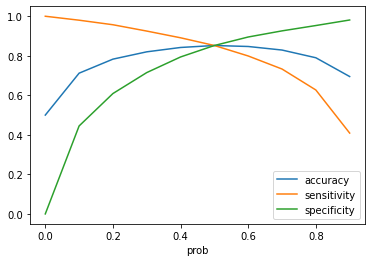

In [323]:
cutoff.plot.line(x='prob', y=['accuracy', 'sensitivity', 'specificity'])

In [324]:
_test_percentage = log_alg.predict_proba(x_smt_test)[:,1]
test_churn_predicted = pd.DataFrame({'ChurnProbability': log_alg.predict_proba(x_smt_test)[:,1]})
test_churn_predicted['y_test'] = y_smt_test
test_churn_predicted['0.55_predict'] = test_churn_predicted.ChurnProbability.map(lambda x: 1 if x > 0.55 else 0)
test_churn_predicted['0.65_predict'] = test_churn_predicted.ChurnProbability.map(lambda x: 1 if x > 0.65 else 0)
test_churn_predicted['0.60_predict'] = test_churn_predicted.ChurnProbability.map(lambda x: 1 if x > 0.6 else 0)
test_churn_predicted.head(10)

ChurnProbability  y_test  0.55_predict  0.65_predict  0.60_predict
0          0.074028       0             0             0             0
1          0.960623       1             1             1             1
2          0.801070       0             1             1             1
3          0.318869       0             0             0             0
4          0.259954       0             0             0             0
5          0.054136       0             0             0             0
6          0.000116       0             0             0             0
7          0.085937       0             0             0             0
8          0.057802       0             0             0             0
9          0.598819       0             1             0             0

In [325]:
print(metrics.confusion_matrix(test_churn_predicted.y_test, test_churn_predicted['0.65_predict'])) 
print(metrics.confusion_matrix(test_churn_predicted.y_test, test_churn_predicted['0.60_predict'])) 
print(metrics.confusion_matrix(test_churn_predicted.y_test, test_churn_predicted['0.55_predict'])) 

[[4986  489]
 [1254 4221]]
[[4891  584]
 [1099 4376]]
[[4786  689]
 [ 973 4502]]


In [326]:
_percentage = log_alg.predict_proba(x_smt_test)[:,1]

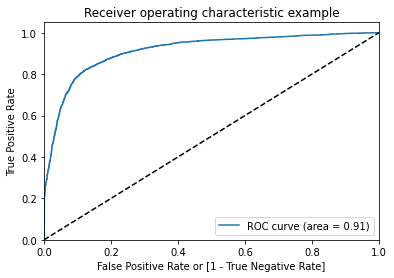

In [328]:
def draw_roc(actual, probability):
    fpr, tpr, thershoulds = metrics.roc_curve(actual, probability, drop_intermediate=False)
    auc = metrics.roc_auc_score(actual, probability)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

draw_roc(y_smt_test, _percentage)


In [329]:
pca_column_frame['sampling_coeff'] = log_alg.coef_[0]
pca_column_frame.iloc[(-np.abs(pca_column_frame['sampling_coeff'].values)).argsort()]

PC1       PC2              Feature     coeff  sampling_coeff
82  0.001518  0.002150  data_usage_8versus7 -2.306150       -3.251132
85  0.000180  0.011717  max_rech_amt_7from6 -1.675148       -2.765558
81  0.038774 -0.058588        avg_data_used -1.354267       -2.179779
80  0.120128  0.171093     avg_rech_amt_6_7  1.247949        1.988985
66  0.198469 -0.025797       total_ic_mou_6 -1.659189       -1.754458
..       ...       ...                  ...       ...             ...
33  0.148195 -0.028720     loc_ic_t2t_mou_6  0.040245        0.018704
1  -0.001304  0.183452          onnet_mou_7 -0.000773        0.015474
61  0.086587 -0.008706   last_day_rch_amt_8 -0.073789       -0.005765
16  0.101934 -0.044006     loc_og_t2f_mou_6  0.009891       -0.003437
76 -0.012767  0.125377     total_rech_num_7 -0.123273        0.001064

[89 rows x 5 columns]

# **After PCA: Random forest 3rd model**

In [331]:
model_rf = RandomForestClassifier(bootstrap=True,
                                  max_depth=10,
                                  min_samples_leaf=100, 
                                  min_samples_split=200,
                                  n_estimators=50,
                                  oob_score = True, n_jobs = -1,
                                  random_state =50,
                                  max_features = 15,
                                  max_leaf_nodes = 30)
model_rf.fit(x_smt_train, y_smt_train)

# Make predictions
prediction_test = model_rf.predict(x_smt_test)

print(classification_report(y_smt_test,prediction_test))
print(confusion_matrix(y_smt_test,prediction_test))


              precision    recall  f1-score   support

           0       0.81      0.86      0.83      5475
           1       0.85      0.79      0.82      5475

    accuracy                           0.83     10950
   macro avg       0.83      0.83      0.83     10950
weighted avg       0.83      0.83      0.83     10950

[[4735  740]
 [1142 4333]]


# **4th model fit on Sampled data**

In [336]:
sklearn_logit_model = LogisticRegression(random_state=0).fit(x_smt_train, y_smt_train)
sklearn_logit_model.fit(x_smt_train, y_smt_train)
prediction_test = model_rf.predict(x_smt_test)
print(classification_report(y_smt_test,prediction_test))
print(confusion_matrix(y_smt_test,prediction_test))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83      5475
           1       0.85      0.79      0.82      5475

    accuracy                           0.83     10950
   macro avg       0.83      0.83      0.83     10950
weighted avg       0.83      0.83      0.83     10950

[[4735  740]
 [1142 4333]]


# **Insights from important features identified in interpretable model (features with large coefficients) and through feature importance graph of RFECV**

**40% reduction in maximum recharge amount in month 8 verus month 7 for churned customers**

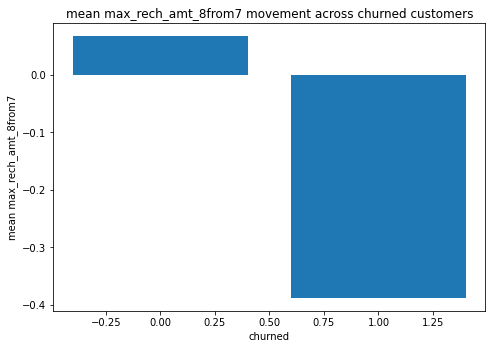

In [270]:
pivt = churn_data_hcv_outlier_treated.pivot_table(index='churned',values='max_rech_amt_8from7',aggfunc = 'mean')
repaired_df = pd.DataFrame(pivt.to_records())
repaired_df = repaired_df.sort_values(by='max_rech_amt_8from7')
repaired_df.head()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(repaired_df['churned'],repaired_df['max_rech_amt_8from7'])
ax.set_ylabel('mean max_rech_amt_8from7')
ax.set_xlabel('churned')
ax.set_title('mean max_rech_amt_8from7 movement across churned customers')
plt.show()

****50% reduction in calling minutes in month 8 verus month 7 for churned customers****

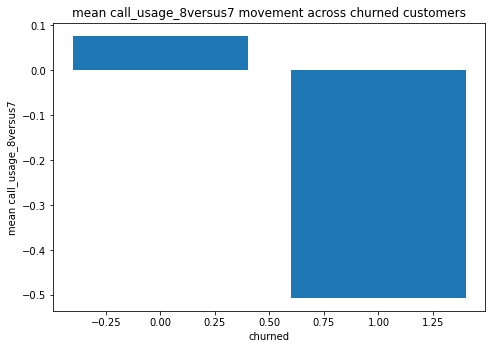

In [271]:
pivt = churn_data_hcv_outlier_treated.pivot_table(index='churned',values='call_usage_8versus7',aggfunc = 'mean')
repaired_df = pd.DataFrame(pivt.to_records())
repaired_df = repaired_df.sort_values(by='call_usage_8versus7')
repaired_df.head()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(repaired_df['churned'],repaired_df['call_usage_8versus7'])
ax.set_ylabel('mean call_usage_8versus7')
ax.set_xlabel('churned')
ax.set_title('mean call_usage_8versus7 movement across churned customers')
plt.show()

**Number of recharges for churned customers is half (at ~5) of non-churned customers (=~10).**

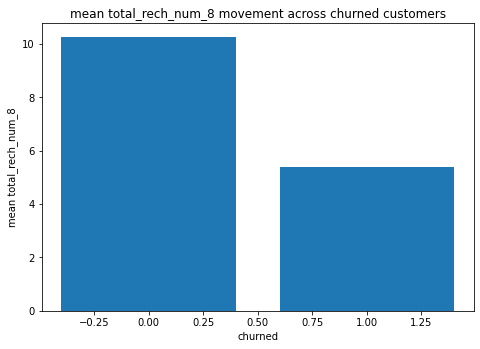

In [273]:
pivt = churn_data_hcv_outlier_treated.pivot_table(index='churned',values='total_rech_num_8',aggfunc = 'mean')
repaired_df = pd.DataFrame(pivt.to_records())
repaired_df = repaired_df.sort_values(by='total_rech_num_8')
repaired_df.head()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(repaired_df['churned'],repaired_df['total_rech_num_8'])
ax.set_ylabel('mean total_rech_num_8')
ax.set_xlabel('churned')
ax.set_title('mean total_rech_num_8 movement across churned customers')
plt.show()

**Churned customers have lower on-net minutes of usage**

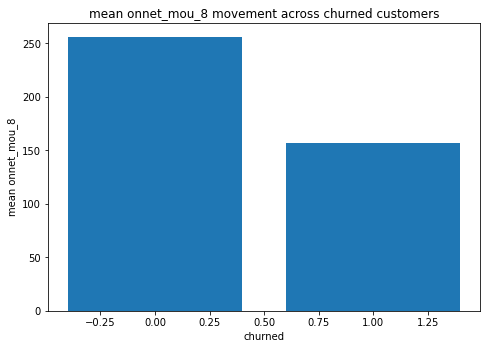

In [274]:
pivt = churn_data_hcv_outlier_treated.pivot_table(index='churned',values='onnet_mou_8',aggfunc = 'mean')
repaired_df = pd.DataFrame(pivt.to_records())
repaired_df = repaired_df.sort_values(by='onnet_mou_8')
repaired_df.head()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(repaired_df['churned'],repaired_df['onnet_mou_8'])
ax.set_ylabel('mean onnet_mou_8')
ax.set_xlabel('churned')
ax.set_title('mean onnet_mou_8 movement across churned customers')
plt.show()

**Churned customers have lower off-net minutes of usage**

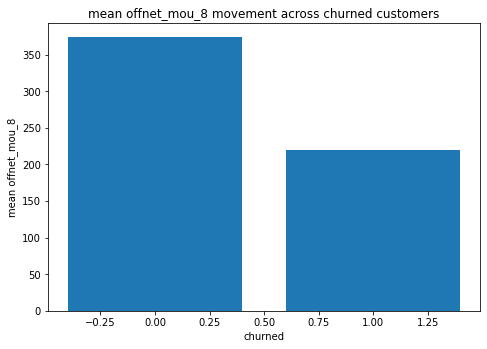

In [275]:
pivt = churn_data_hcv_outlier_treated.pivot_table(index='churned',values='offnet_mou_8',aggfunc = 'mean')
repaired_df = pd.DataFrame(pivt.to_records())
repaired_df = repaired_df.sort_values(by='offnet_mou_8')
repaired_df.head()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(repaired_df['churned'],repaired_df['offnet_mou_8'])
ax.set_ylabel('mean offnet_mou_8')
ax.set_xlabel('churned')
ax.set_title('mean offnet_mou_8 movement across churned customers')
plt.show()

**Churned customers had a large drop in 3g usage over 6th to 8th month, which can point towards data connectivity/speed issues.**

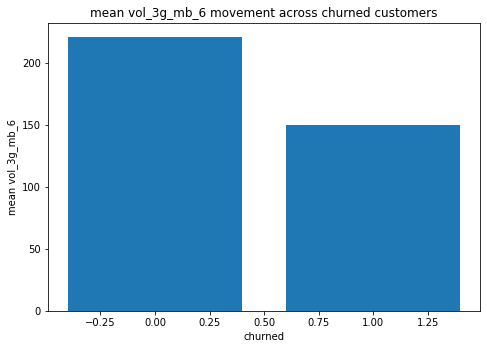

In [278]:
pivt = churn_data_hcv_outlier_treated.pivot_table(index='churned',values='vol_3g_mb_6',aggfunc = 'mean')
repaired_df = pd.DataFrame(pivt.to_records())
repaired_df = repaired_df.sort_values(by='vol_3g_mb_6')
repaired_df.head()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(repaired_df['churned'],repaired_df['vol_3g_mb_6'])
ax.set_ylabel('mean vol_3g_mb_6')
ax.set_xlabel('churned')
ax.set_title('mean vol_3g_mb_6 movement across churned customers')
plt.show()

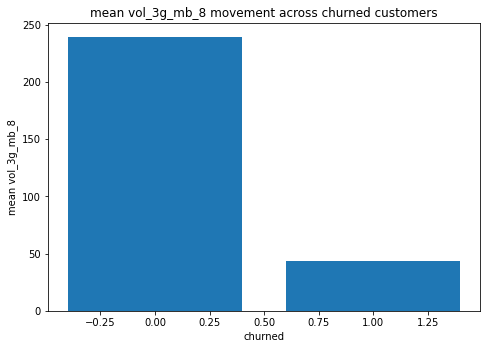

In [276]:
pivt = churn_data_hcv_outlier_treated.pivot_table(index='churned',values='vol_3g_mb_8',aggfunc = 'mean')
repaired_df = pd.DataFrame(pivt.to_records())
repaired_df = repaired_df.sort_values(by='vol_3g_mb_8')
repaired_df.head()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(repaired_df['churned'],repaired_df['vol_3g_mb_8'])
ax.set_ylabel('mean vol_3g_mb_8')
ax.set_xlabel('churned')
ax.set_title('mean vol_3g_mb_8 movement across churned customers')
plt.show()

# **Analysis results:**
1. Customer churn is not a impulsive and/or point in time action, a customer churns over a period of time and often offers a window of intervention when the churn can be predicted and possibly reverted.
2. This window of intervention is mostly limited to last 2 months (majorly a month before churn). The reason for this is that telecommunications is a critical service and often dissatisfied customers do not wait for multiple months before churning, also, they do not churn with a flip/instatenously as it takes time to assess alternative operator /plan / coverage /rates etc.
3. A number of factors derived from a customer's usage pattern can help us not only predict customer's at the risk of churning but can also help us intervene meaningfully to reduce churn possibility (please note that there is no guranteed way of stopping the churn).

# **Top predictors of churn:**
1. **A drop (significant or consistent over months) in maximum recharge amount for a month:** The customer generally plan the churn ahead and reduce their investment on platform over a period of time. Thus this variable becomes a good predictor of churn.
2. **Drop in data & call usage:** This behaviour can be attributed to customer either not able to use data/call facilities due to poor network and/or technical issues, or due to customer gradually limiting use of problematic services.
3. **Number of recharges done by churned customers (5) is approximately half of non-churned customers(10)**
4. **Churned customers had a large drop in 3g usage over 6th to 8th month, which can point towards data connectivity/speed issues.**




# **Recommendations:**
1.   Whenever the telecom company observes a significant drop in customer's "maximum recharge amount" , "average data or call minutes (incoming+outgoing)", "number of recharges per month" the company should proactively reach out to these high value customers to know the reason driving it. This should be done through a service/feedback call and not as a inquiry call for reduced spends. This will help understand the problem customer is facing and resolve it on time.
2.   Also, the customer retention efforts, like free data plans/reduced tariffs/gift-vouchers should be provided to these at-risk customers (identified from step 1 above), to compensate for bad experience (if that was the risk identified through above service call) or else to match competitor offer (if that is the reason for churn risk).
3. There should be multiple hooks which telecom company should use to target and retain high value customers (quality service offcouse being the top of the list). These hooks can be random discounts on bills, special top-up vouchers, personalised tariff plans based on usage, free gift cards. Retention of a profitable customer should be an active effort versus a reactive one. 
4. Telecom company should proactively do pulse check with high value customers about speed of 3g internet services, connectivity, quality of calls, coverage etc. The pulse check should be done in a way which is easier for customer to respond to.




# **Appendix**

In [144]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [145]:
churn_data_with_dummies.to_csv('churn_data_with_dummies.csv')
!cp churn_data_with_dummies.csv "drive/My Drive/telecom_churn/churn_data_with_dummies.csv"

In [3]:
import io
from google.colab import files
uploaded = files.upload()

Saving churn_data_hcv_reduced_outlier.csv to churn_data_hcv_reduced_outlier.csv


In [4]:
churn_data_hcv_reduced_outlier = pd.read_csv(io.BytesIO(uploaded['churn_data_hcv_reduced_outlier.csv']))
churn_data_hcv_reduced_outlier.head() #checking 1st 5 rows of imported data

Unnamed: 0  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  onnet_mou_6  \
0           7             0.0             0.0             0.0        57.84   
1           8             0.0             0.0             0.0       413.69   
2          13             0.0             0.0             0.0       501.76   
3          16             0.0             0.0             0.0        50.51   
4          17             0.0             0.0             0.0      1185.91   

   onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
0        54.68        52.29        453.43        567.16        325.91   
1       351.03        35.08         94.66         80.63        136.48   
2       108.39       534.24        413.31        119.28        482.46   
3        74.01        70.61        296.29        229.74        162.76   
4         9.28         7.79         61.64          0.00          5.54   

   roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
0          16.23          33.49          31.64          23.74          12.59   
1           0.00           0.00           0.00           0.00           0.00   
2          23.53         144.24          72.11           7.98          35.26   
3           0.00           2.83           0.00           0.00          17.74   
4           0.00           4.76           4.81           0.00           8.46   

   roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
0          38.06             51.39             31.38             40.28   
1           0.00            297.13            217.59             12.49   
2           1.44             49.63              6.19             36.01   
3           0.00             42.61             65.16             67.38   
4          13.34             38.99              0.00              0.00   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
0            308.63            447.38            162.28             62.13   
1             80.96             70.58             50.54              0.00   
2            151.13             47.28            294.46              4.54   
3            273.29            145.99            128.28              0.00   
4             58.54              0.00              0.00              0.00   

   loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
0             55.14             53.23               0.0               0.0   
1              0.00              0.00               0.0               0.0   
2              0.00             23.51               0.0               0.0   
3              4.48             10.26               0.0               0.0   
4              0.00              0.00               0.0               0.0   

   loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
0              0.00        422.16        533.91        255.79   
1              7.15        378.09        288.18         63.04   
2              0.49        205.31         53.48        353.99   
3              0.00        315.91        215.64        205.93   
4              0.00         97.54          0.00          0.00   

   std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  \
0              4.30             23.29             12.01             49.89   
1            116.56            133.43             22.58             13.69   
2            446.41             85.98            498.23            255.36   
3              7.89              2.58              3.23             22.99   
4           1146.91              0.81              0.00              1.55   

   std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
0             31.76             49.14              6.66             20.08   
1             10.04             75.69              0.00              0.00   
2             52.94            156.94              0.00              0.00   
3             64.51             18.29              0.00              0.00   
4   

In [ ]:
#visualizing count of Variable based on Converted value
s1=sns.countplot(churn_data_hcv_outlier_treated['max_rech_amt_8from7 '], hue=churn_data_hcv_outlier_treated.churned)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()